# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For split train and test
from sklearn.model_selection import train_test_split

# For the models we will use in this project
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree

# For tuning the model
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [2]:
# Mounting our google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Opening the file with pandas
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Week_5/Project_2/ExtraaLearn.csv')

In [4]:
# Taking a copy of the original Dataframe to avoid changing any information
data = df.copy()

## Data Overview

- Observations
- Sanity checks

In [5]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.06,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91,Email Activity,No,No,No,No,No,0


In [6]:
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.88,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.08,Phone Activity,No,No,No,No,No,0


In [7]:
print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns')

The data has 4612 rows and 15 columns


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

At first sight,


*   Our dataset has 4 int64, 1 float and 10 object colums
*   We do not have missing values in any of these features
*   We have some columns that are Yes/No value. We need to confirm we have only binary values if yes we can convert those columns to numeric 0/1 columns

In [9]:
# Let's confirm that we do not have missing values
data.isnull().sum()

,0
ID,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0


**Note**:

We confirmed using 2 mechanism (the .info() and checking for null) that our dataset is complete we are not missing data. This is a good quality dataset so far

In [10]:
# Let's check for the unique values of each column
df.nunique()

,0
ID,4612
age,46
current_occupation,3
first_interaction,2
profile_completed,3
website_visits,27
time_spent_on_website,1623
page_views_per_visit,2414
last_activity,3
print_media_type1,2


**Observation**:

*   The column ID,as mentioned in the dataset description provide, is the ID of each lead. We confirmed that we do not have duplicated values and the number of unique values is the same as the size of the data set. Said that, we can drop this column since it won't add any relevant information to the model

In [11]:
# Checking for duplicated rows in the dataset
data.duplicated().sum()

0

In [12]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing the count of each unique value
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

ID
EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
EXT3077    1
EXT3076    1
EXT3075    1
EXT3074    1
EXT3073    1
EXT3072    1
EXT3071    1
EXT3070    1
EXT3069    1
EXT3068    1
EXT3067    1
EXT3066    1
EXT3081    1
EXT3082    1
EXT3083    1
EXT3092    1
EXT3098    1
EXT3097    1
EXT3096    1
EXT3095    1
EXT3094    1
EXT3093    1
EXT3091    1
EXT3084    1
EXT3090    1
EXT3089    1
EXT3088    1
EXT3087    1
EXT3086    1
EXT3085    1
EXT3065    1
EXT3064    1
EXT3063    1
EXT3037    1
EXT3043    1
EXT3042    1
EXT3041    1
EXT3040    1
EXT3039    1
EXT3038    1
EXT3036    1
EXT3045    1
EXT3035    1
EXT3034    1
EXT3033    1
EXT3032    1
EXT3031    1
EXT3030    1
EXT3044    1
EXT3046    1
EXT3062    1
EXT3055    1
EXT3061    1
EXT3060    1
EXT3059    1
EXT3058    1
EXT3057    1
EXT3056    1
EXT3054    1
EXT3047    1
EXT3053    1
EXT3052    1
EXT3051    1
EXT3050    1
EXT3049    1
EXT3048    1
EXT3099    1
EXT3100    1
EXT3101    1
EXT3146    1
EXT3152    1
EXT3151  

**Observations**:

*   We do not have duplicate values in our dataset
*   The columns print_media_type1,	print_media_type2,	digital_media,	educational_channels and	referral are the Yes/No columns and with the unique validation we have only 2 values on each one of those columns. So we can transform these columns to numeric binary 0/1 columns
*   The column current_ocupation, first_interaction, profile_complete, last_activity looks consistent with the number of different values indicated in the dataset description.



In [13]:
# I want to check the statistical summary of our dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00,46.20,13.16,18.00,36.00,51.00,57.00,63.00
website_visits,4612.00,3.57,2.83,0.00,2.00,3.00,5.00,30.00
time_spent_on_website,4612.00,724.01,743.83,0.00,148.75,376.00,1336.75,2537.00
page_views_per_visit,4612.00,3.03,1.97,0.00,2.08,2.79,3.76,18.43
status,4612.00,0.30,0.46,0.00,0.00,0.00,1.00,1.00


**Observations**:

*   Mean and Median of age indicates that our main users are not young customers. We have Customers from 18 until 63 years old (We will confirm this during the EDA)
*   website_visits mean and median are low values, but we have a max of 30. This could be an outlier TBC
*   time_spent_on_website mean and median have a big difference, this indicate that we have skewed data
*   page_view_per_visit mean and median values are close to ~3, but we have a max of 18 we need to validate if this is an outlier similar to the time_spent_on_website column
*   Our target variable status looks a little bit imbalanced as most of the values are 0



## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

**NOTE:**

I will re-use some functions we have been using in the different case studies. I saw a comment in our discussion forum that is acceptable and is not considered cheating

*   histogram_boxplot
*   stacked_barplot



In [14]:
# Function shared in a previous case study
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram
    feature_skew = 'The ' + feature + ' Skew is:' + str(round(data[feature].skew(),2))
    print(feature_skew)



In [15]:
# Function shared in a previous case study
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
        by = sorter, ascending = False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(
        by = sorter, ascending = False
    )
    tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 5))
    plt.legend(
        loc = "lower left",
        frameon = False,
    )
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    plt.show()

In [16]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


In [17]:
def get_correlation(data):
  plt.figure(figsize = (15,7))
  corr = data.corr(numeric_only = True)
  #sns.heatmap(data.corr(numeric_only = True), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")
  sns.heatmap(corr, annot = True, cmap = 'coolwarm',
        fmt = ".3f",
        xticklabels = corr.columns,
        yticklabels = corr.columns)

The age Skew is:-0.72


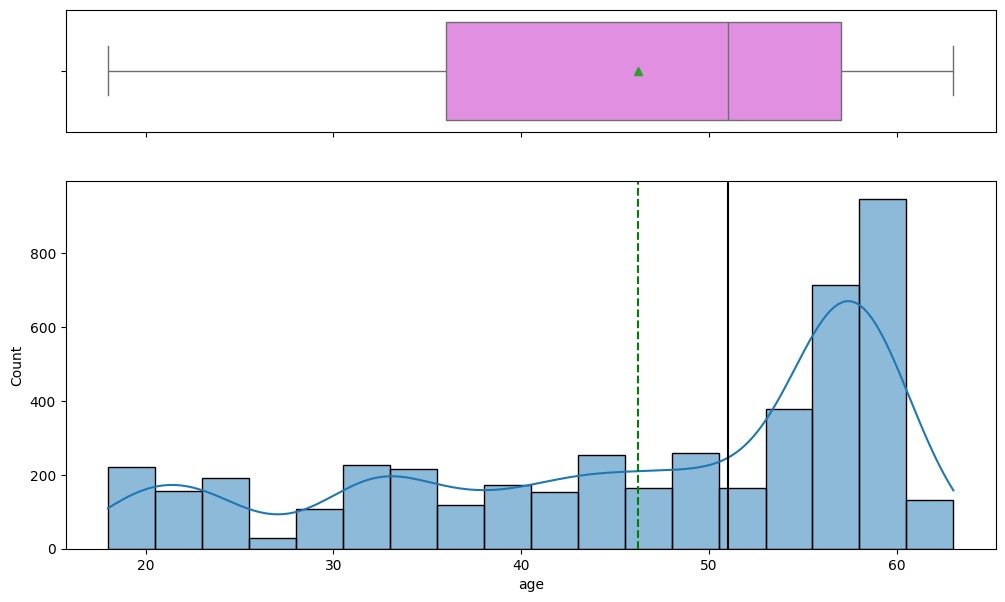

In [18]:
histogram_boxplot(data, 'age', kde=True)

**Observations**

*   As we saw in the statistical information, we have a negative skewed or left-skewed age distribution
*   We can see an increase of the age around ~53 ages.
*   We do not have outliers



The website_visits Skew is:2.16


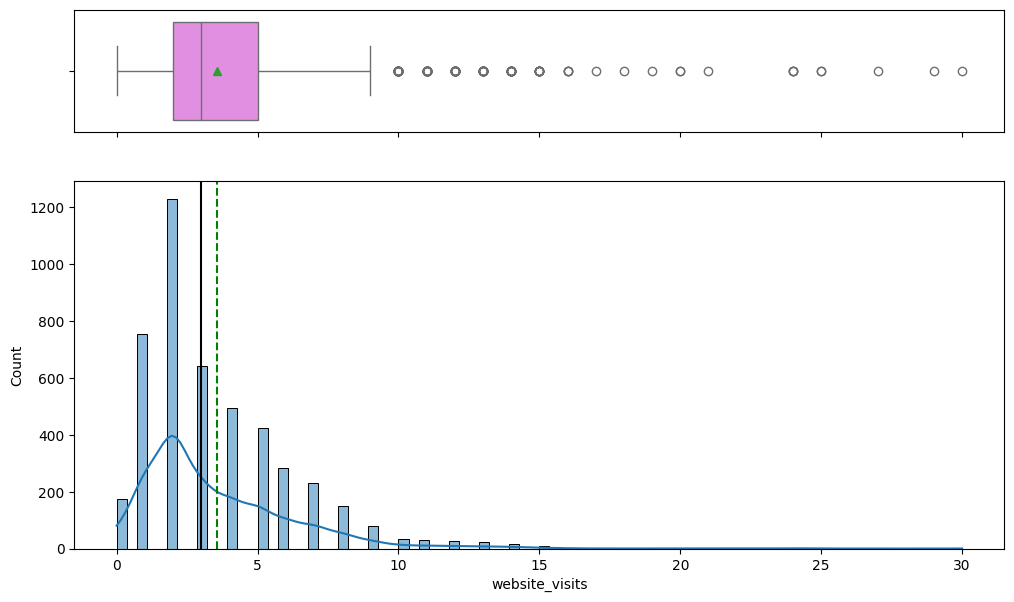

In [19]:
histogram_boxplot(data, 'website_visits', kde=True)

In [20]:
website_visits_outliers = (data['website_visits'] > 9).sum()
print(f'Number of outliers is: {website_visits_outliers}')

Number of outliers is: 154


**Observations:**

*   website_visits is right skewed or positive skew and we can see outliers on the right side
*   154 outliers in total ~3.33% of the total Dataset




The time_spent_on_website Skew is:0.95


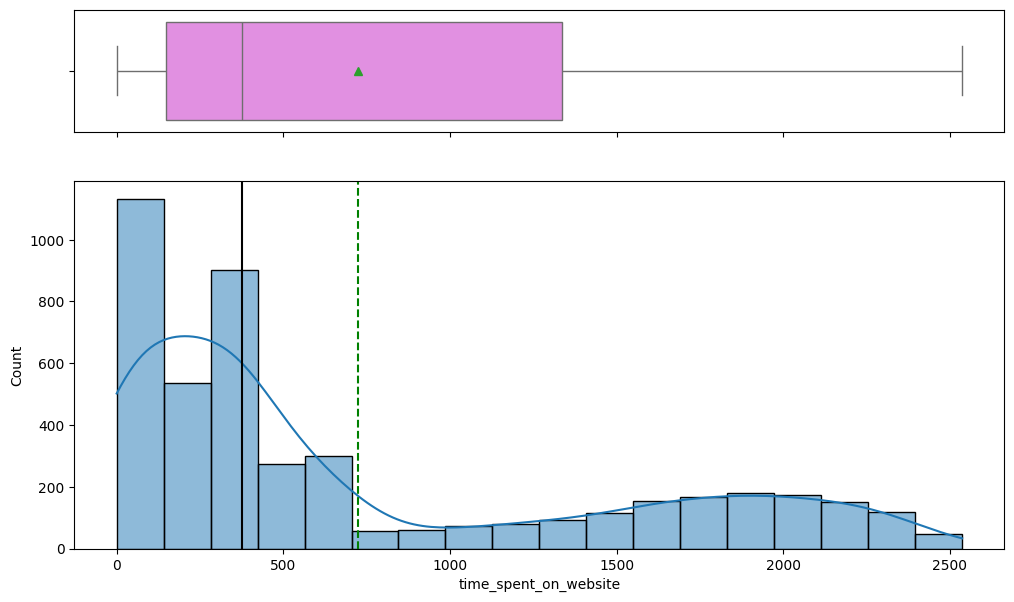

In [21]:
histogram_boxplot(data, 'time_spent_on_website', kde=True)

**Observations**:

*   time_spent_on_website is right skewed, but there are no outliers. the dsitribution between 1000 and 2500 looks normal distributed


The page_views_per_visit Skew is:1.27


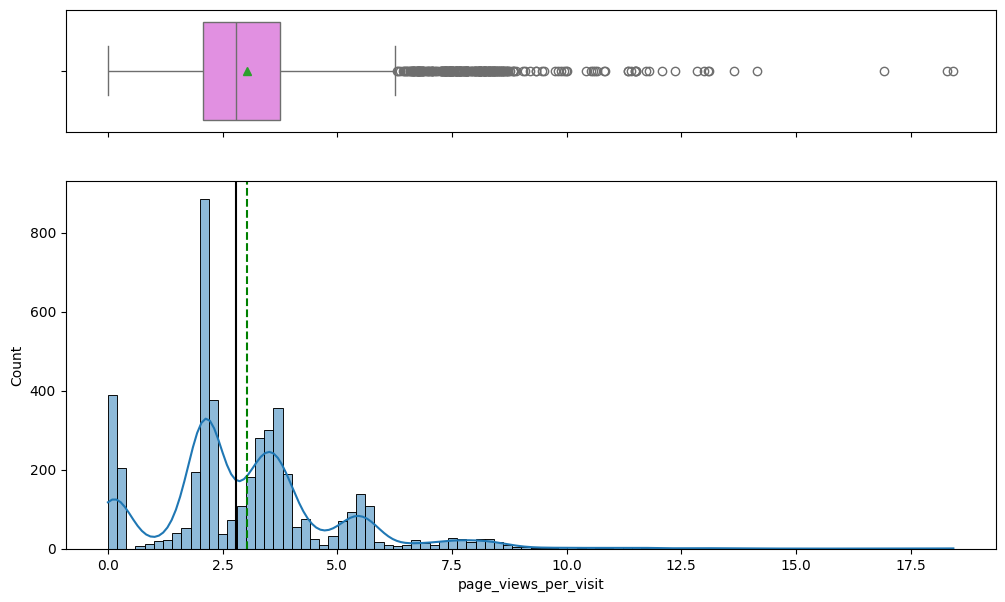

In [22]:
histogram_boxplot(data, 'page_views_per_visit', kde=True)

In [23]:
page_views_per_visit_outliers = (data['page_views_per_visit'] > 6.25).sum()
print(f'Number of outliers is: {page_views_per_visit_outliers}')

Number of outliers is: 260


**Observations**:

*   Page_views_per_visit is right skewed, around ~2 is the highest number of visits
*   We can identify some outliers at the right after the value of 6.25, in total we have 260 records that is ~5.6%.

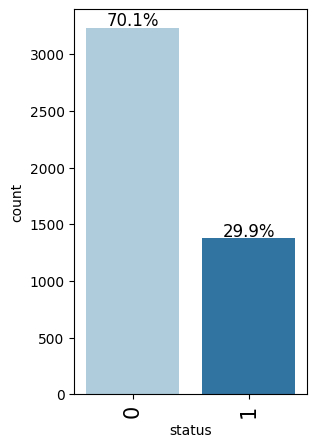

In [24]:
labeled_barplot(data, 'status', perc=True)

**Observations**:

*   In the case of our target variable, we have a 70-30 distribution, 70% for people who didn't convert to paid lead and 30% of the leads who did it
*   Since this is an umbalanced target variable, we will use this information to train the models



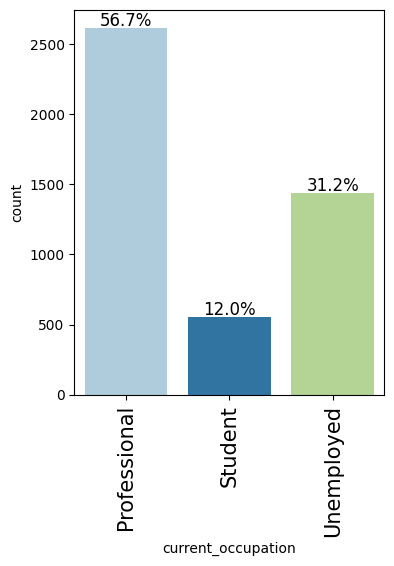

In [25]:
labeled_barplot(data, 'current_occupation', perc=True)

**Observations**:

*   As we can see, **Professional** has more than **50%** of the leads, in the second position we have **unemployed** with **31%** which could sound weird but based ont he age analysis we saw that leads over 53 were a big proportion.
*   **Students** are only **12%** of our leads





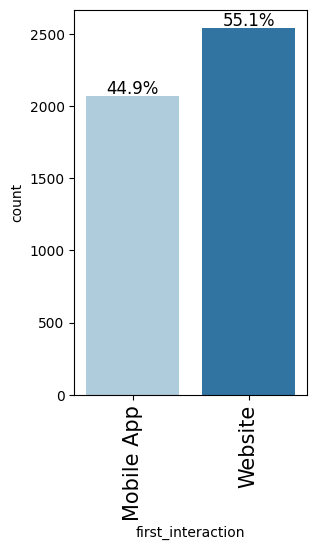

In [26]:
labeled_barplot(data, 'first_interaction', perc=True)

**Observations**:

*   The distribution between website 55% and mobile 45% is really close almost 50-50.



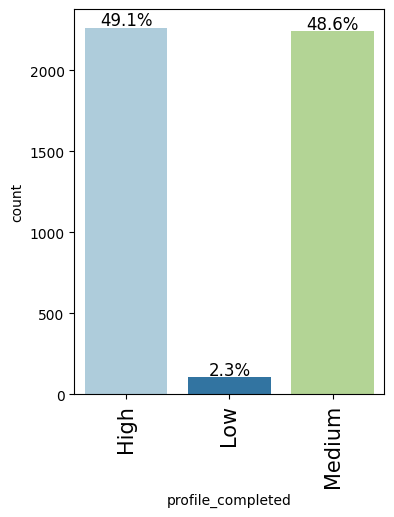

In [27]:
labeled_barplot(data, 'profile_completed', perc=True)

**Observations**:


*   The distribution between High and Medium is really similar, 49% and 48% respectively
*   Low profile completion is only 2.3%, that means that the vast majority of the leads are working on theyr



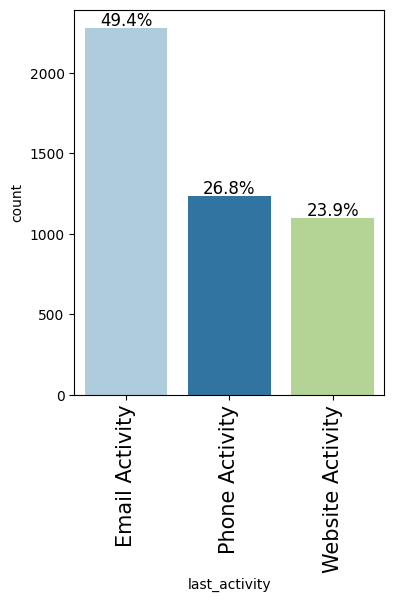

In [28]:
labeled_barplot(data, 'last_activity', perc=True)

**Observations**:

*   The last interaction the leads are having with the company is via email with 49%
*   Phone and website are close with 27 and 23% respectively
It will be interesting to understand more how is the relationship between last_activity and status to verify if the converted leads are using this communication channel



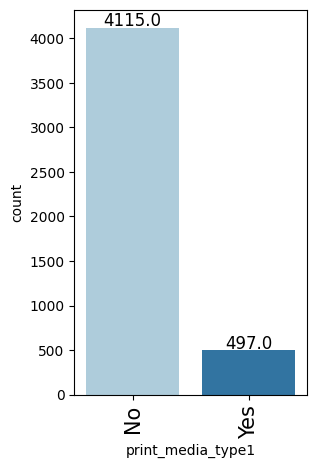

In [29]:
# print_media_type1 = Ad seen in Newspaper
labeled_barplot(data, 'print_media_type1')

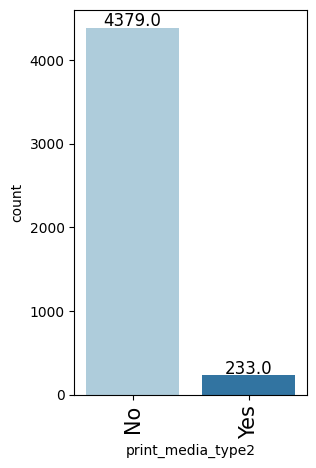

In [30]:
# print_media_type2 = Ad seen in Magazine
labeled_barplot(data, 'print_media_type2')

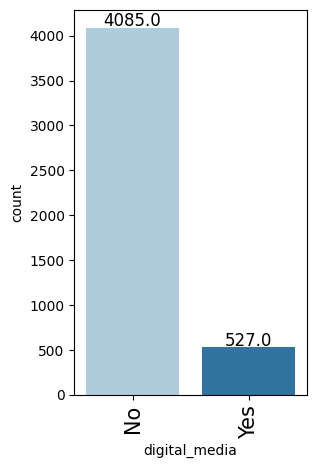

In [31]:
# digital_media = Ad seen in Digital Platforms
labeled_barplot(data, 'digital_media')

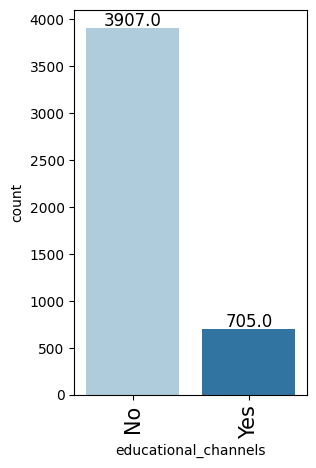

In [32]:
labeled_barplot(data, 'educational_channels')

In [33]:
no_ads = (data['print_media_type1'] == 'No') & (data['print_media_type2'] == 'No') & (data['digital_media'] == 'No') & (data['educational_channels'] == 'No')
any_ads = (data['print_media_type1'] == 'Yes') | (data['print_media_type2'] == 'Yes') | (data['digital_media'] == 'Yes') | (data['educational_channels'] == 'Yes')
print(f'Leads that did not see ad at any platform: {no_ads.sum()}')
print(f'Leads that saw ad on any platform: {any_ads.sum()}')

Leads that did not see ad at any platform: 2943
Leads that saw ad on any platform: 1669


**Observations**:

*   705 Leads indicated they saw an ad on any educational channel
*   527 Leads indicated they saw an ad on Digital Media
*   497 Leads indicated they saw an ad on Newspaper
*   233 Leads indicated they saw an ad on Magazine
*   We found that 2943 Leads indicated they didn't see ads at any platform which is around **63%** this is something relevant for the team that is in charge of the Ads
*   Only 1669 Leads indicated they saw an ad on any platform which is the **36%**



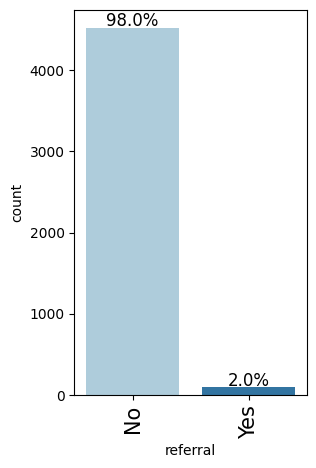

In [34]:
labeled_barplot(data, 'referral', perc=True)

**Observations**:

*   **4519** that is the **98%** of the Leads indicated that they didn't hear about the company through a referral
*   **93** that is the **2%** heard about the company by a referral

NOW, let's perform bivariate analysis



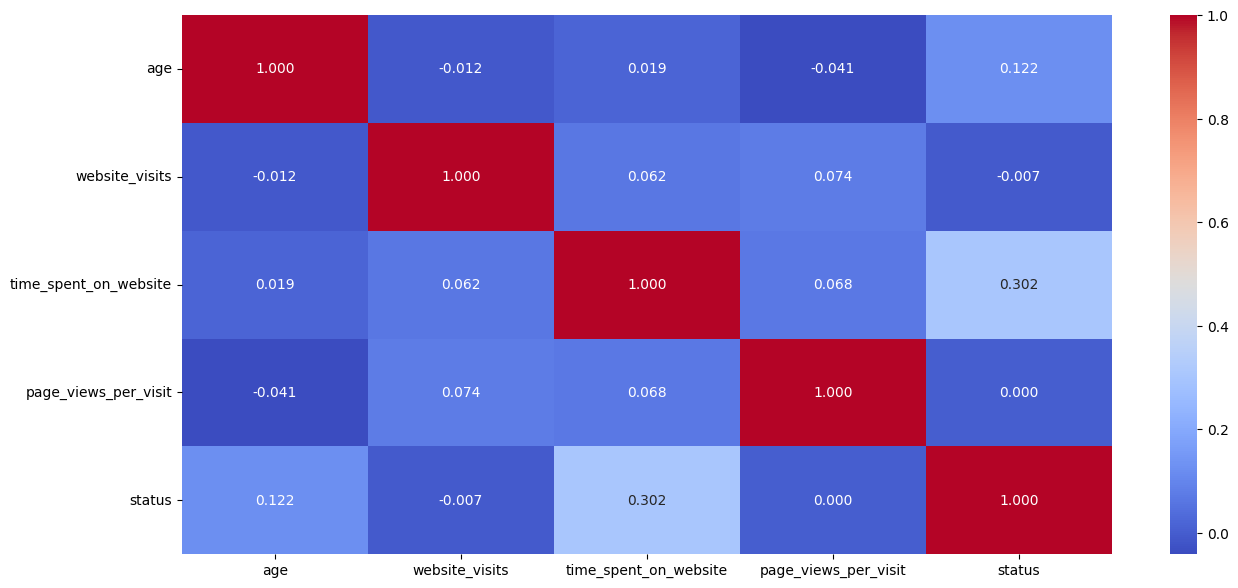

In [35]:
# Lets create a correlation matrix
get_correlation(data)

**Observations**:

*   Age and status has a slight correlation of .122 which means that there is a slight tendency that older leads are more likely to convert to paid leads
*   Website visits and status has a weak negative correlation so suggest that there is no relationship between the number of visits and the conversion of leads to paid
*   Time spend of website and status has a positive correlation 0.302. This suggest that the more time the user spends on the website, the more likely they are to be converted to paid leads. this is the most significant relationship in this matrix
*   website visits show a positive correlation with time spent on website and page views per visit.

Overall, from this correlation analysis we can conclude that increasing the leads engagement with the website could increase the rate conversion



status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


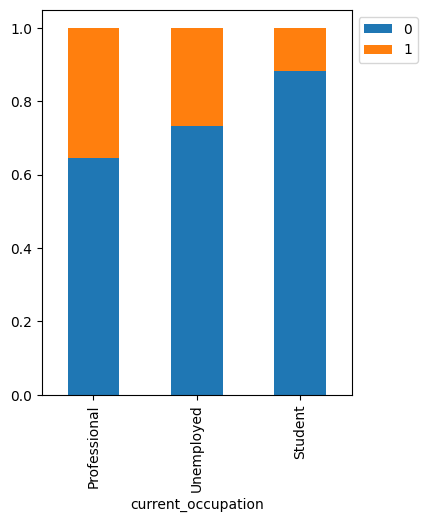

In [36]:
stacked_barplot(data, 'current_occupation', 'status')

**Observations**:


*   Professional has the highest conversation rate with aprox 40%
*   Unemployed is in the second position with around 30%
*   Only ~10% of the students convert to paid leads



status     0     1   All
age                     
All     3235  1377  4612
57       249   136   385
59       207   121   328
58       262   120   382
56       210   120   330
60       162    76   238
55       128    72   200
32       133    55   188
53        51    40    91
50        48    37    85
45        51    33    84
34        43    31    74
46        56    29    85
41        44    26    70
47        55    25    80
44        56    25    81
49        62    25    87
42        59    24    83
43        65    24    89
48        66    22    88
52        55    22    77
36        37    21    58
37        39    21    60
54        67    21    88
35        46    20    66
39        33    19    52
51        69    19    88
40        47    16    63
30        30    14    44
31        25    13    38
38        45    13    58
29        24    12    36
20        63    12    75
24        79    11    90
63        36    11    47
62        37    11    48
18        55    11    66
33        66    10    76


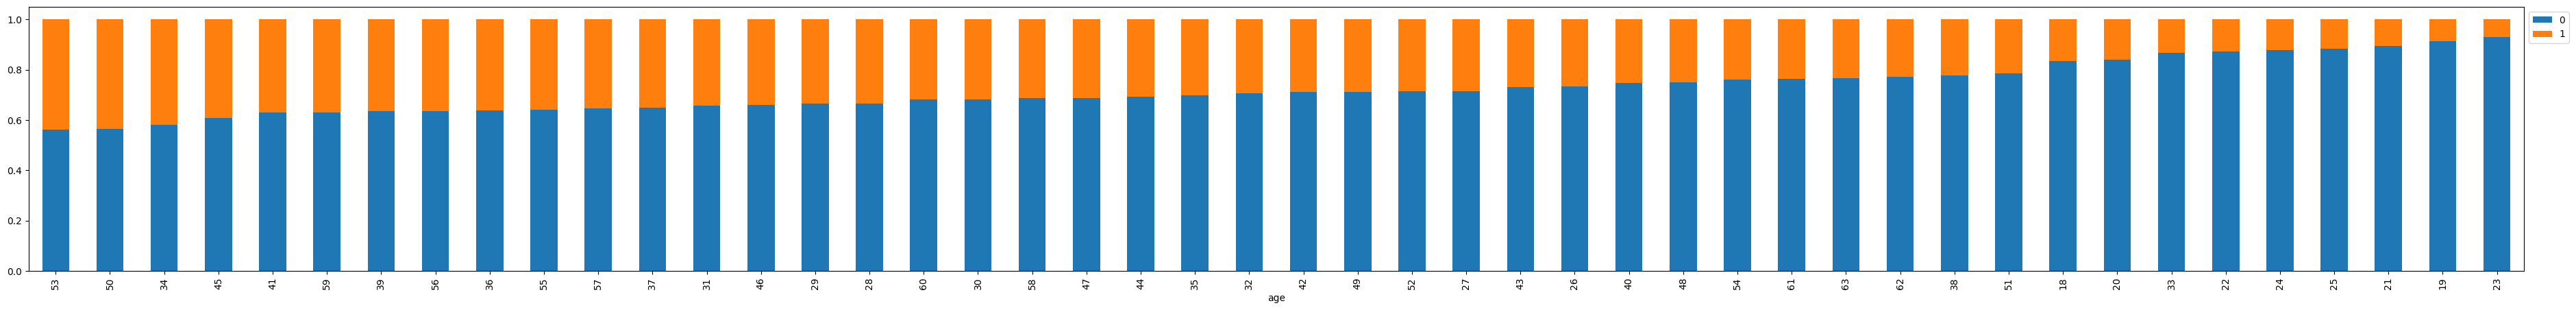

In [37]:
stacked_barplot(data, 'age', 'status')

**Observations**:

*   Leads on the ages of 53,50 and 34 has the highest conversion rate
*   Overall the leads on their 50's are the majority of leads converted
*   Based on this information and grouping by age we can see the following conversion rates
  * Leads lower than 20 years 12%
  * Leads from 20-29 years 15%
  * Leads from 30-39 years 30%
  * Leads from 40-49 years 31%
  * Leads from 50-59 years 34%
  * Leads over 60 years 29%


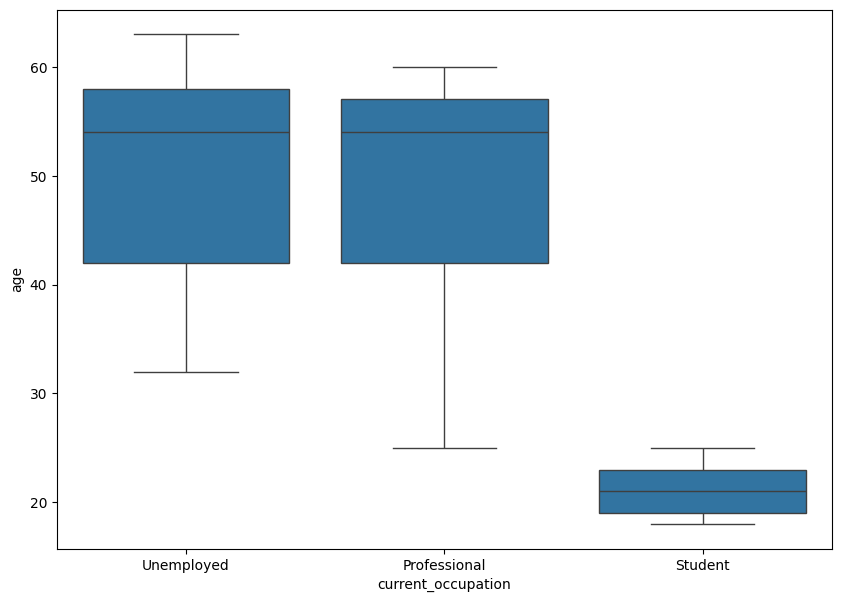

In [38]:
# We saw the distributions between Age, current occupation and status, now let's see how it looks the distribution of the occupation and age
plt.figure(figsize=(10, 7))
sns.boxplot(data = data, x = "current_occupation", y = "age")
plt.show()

**Observations**:

*   The median of age and the occupations of Professional and unemployed are the same. The distributions are very similar.  
*   Students distribution, as expected, are young people between 18 and ~24 years old



current_occupation  Professional  Student  Unemployed   All
age                                                        
All                         2616      555        1441  4612
24                             0       90           0    90
21                             0       86           0    86
23                             0       85           0    85
19                             0       81           0    81
20                             0       75           0    75
22                             0       71           0    71
18                             0       66           0    66
25                            16        1           0    17
26                            15        0           0    15
46                            53        0          32    85
48                            56        0          32    88
49                            61        0          26    87
50                            53        0          32    85
51                            60        

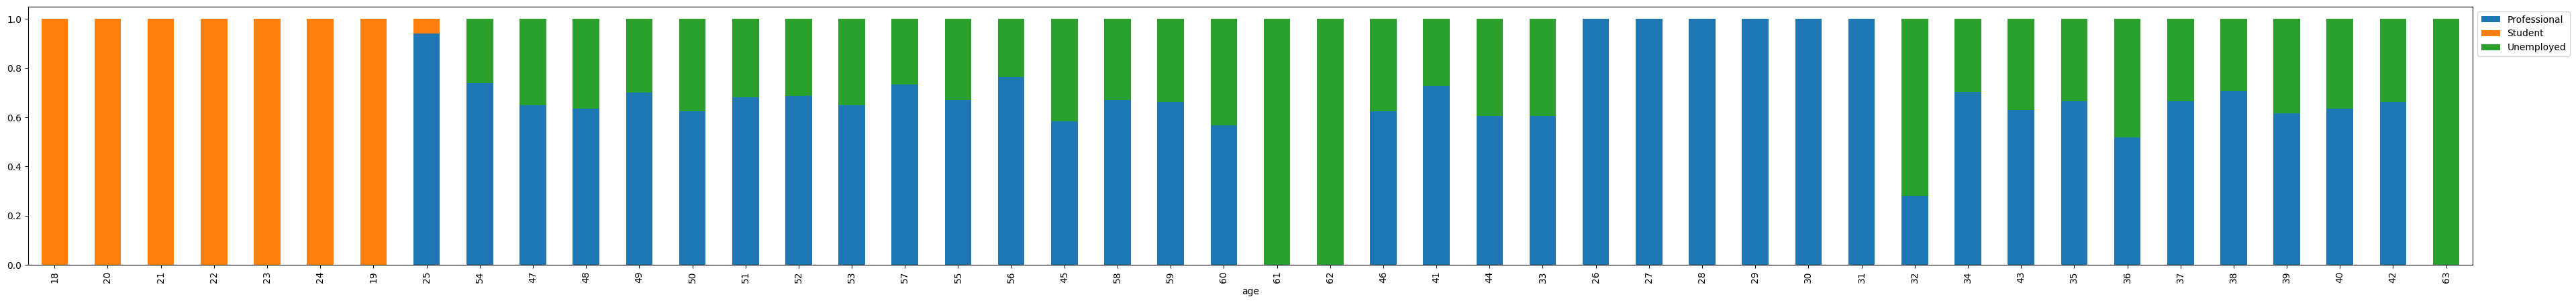

In [39]:
stacked_barplot(data, 'age', 'current_occupation')

**Observations**:

This information is interesting of some clusters based on the age
*   Range of 18-24 years old we have only student leads
*   Range of 26-31 years old we have only Professional leads
*   Range of 61-63 yeras old we have only Unemployed leads

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


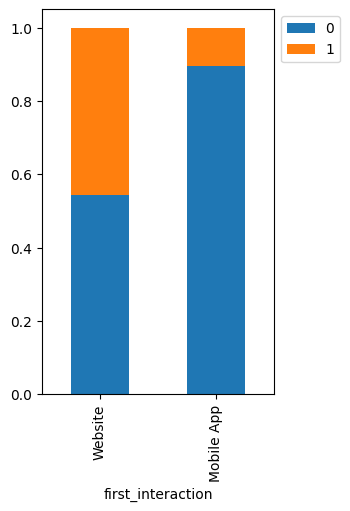

In [40]:
stacked_barplot(data, 'first_interaction', 'status')

**Observations**:


*   The leads that started an interaction with the company via the website has a higher conversion rate of ~46%
*   Users who started the interaction with the company via the mobile app has a very low conversion rate of ~10%



status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


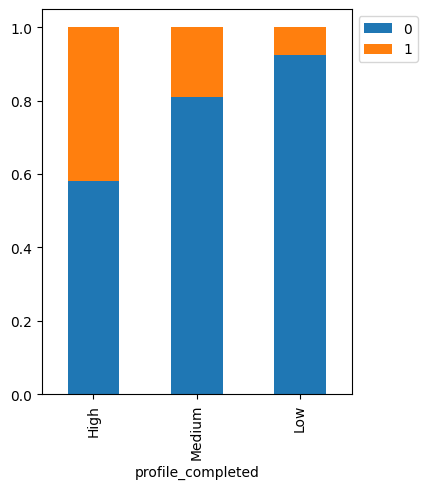

In [41]:
stacked_barplot(data, 'profile_completed', 'status')

**Observations**:


*   The leads with high profile completed has a high conversion rate with 41%
*   Medium profile completed has a conversion rate of 20%
*   Low profile completed has a very low conversion rate of 7%, which could be expected since people with low interest tend to avoid share contact information




status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


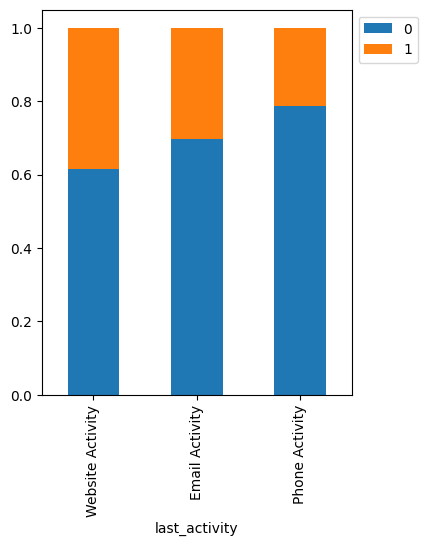

In [42]:
stacked_barplot(data, 'last_activity', 'status')

**Observations**:

*   If the last interaction with the leads was via the website, the conversion rates is aprox 40%
*   Email is 30% and Phone has the lowest conversion rate of 20%

Seems that the leads tend to take the final decision after getting feedback via digital communication channels



status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


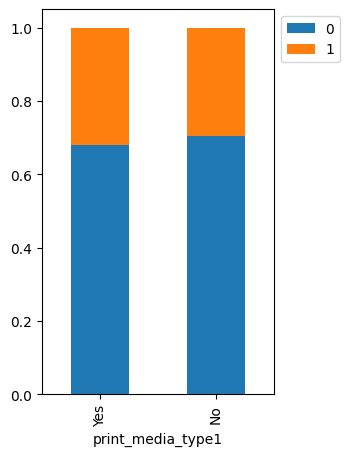

In [43]:
# print_media_type1 = Newspaper
stacked_barplot(data, 'print_media_type1', 'status')

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


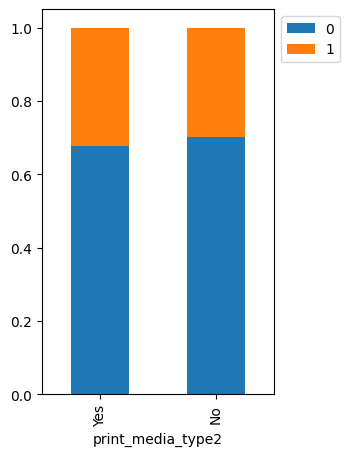

In [44]:
# print_media_type2 = Magazine
stacked_barplot(data, 'print_media_type2', 'status')

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


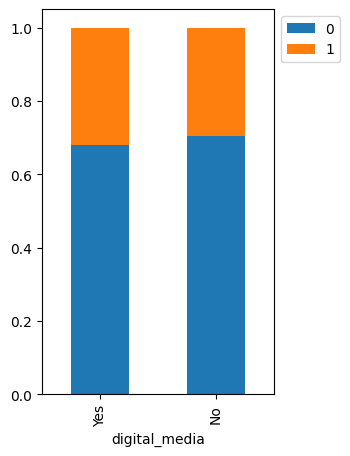

In [45]:
# digital_media = Digital Platforms
stacked_barplot(data, 'digital_media', 'status')

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


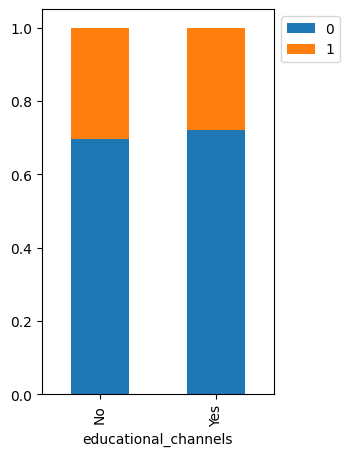

In [46]:
# educational_channels = Any educational channel (online forums, discussion threads, educational websites, etc)
stacked_barplot(data, 'educational_channels', 'status')

**Observations**:


*   Newspaper 159 out of 497 converted =  31%
*   Magazine 75 out of 233 converted = 32%
*   Digital Platforms 168 out of 527 converted = 31%
*   Educational Channels 197 out of 705 converted = 27%

Even when the Educational channels showed a better penetration in the market (more leads indicated they saw the ad in those channels) the conversion rate is the lowest with only 27%.

On the other hand, Newsletter, magazine and digital platforms has similar conversion rate of ~31% but less penetration if compared with Educational channels



In [47]:
filtered_df = df[(df['print_media_type1'] == 'No') &
                 (df['print_media_type2'] == 'No') &
                 (df['digital_media'] == 'No') &
                 (df['educational_channels'] == 'No')]

# Calculate conversion rate
total_leads = len(filtered_df)
paid_customers = len(filtered_df[filtered_df['status'] == 1])
paid_customers_total = len(df[df['status'] == 1])
if total_leads > 0:
    conversion_rate = (paid_customers / total_leads) * 100
else:
    conversion_rate = 0

print(f"Conversion Rate of users who didn't see an ad: {conversion_rate:.2f}%")
print(f"Number of paid customers in total:{paid_customers}")
print(f"Total Number of paid customers:{paid_customers_total}")


Conversion Rate of users who didn't see an ad: 29.70%
Number of paid customers in total:874
Total Number of paid customers:1377


status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


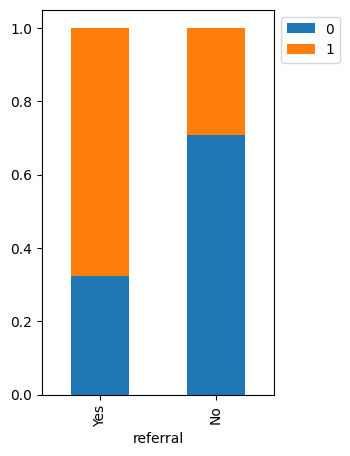

In [48]:
# referral = lead had heard of the company by a referral
stacked_barplot(data, 'referral', 'status')

**Observations**:

*   Leads who heard about the company by referral has a conversion rate very high of almost 70%
*   Leads that didn't get any referral conversion rate is ~30%



profile_completed   High  Low  Medium   All
current_occupation                         
All                 2264  107    2241  4612
Professional        1279   61    1276  2616
Unemployed           702   33     706  1441
Student              283   13     259   555
------------------------------------------------------------------------------------------------------------------------


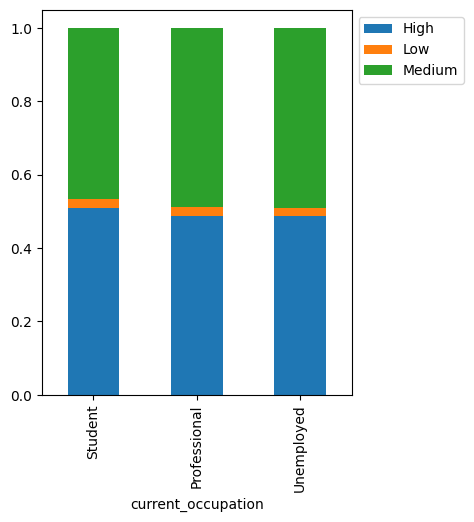

In [49]:
stacked_barplot(data, 'current_occupation', 'profile_completed')

**Observations**:

*   In the case of the profile completed by occupation, we can see that the rate is almost identical in all the occupations.

print_media_type1     No  Yes   All
current_occupation                 
All                 4115  497  4612
Professional        2330  286  2616
Unemployed          1297  144  1441
Student              488   67   555
------------------------------------------------------------------------------------------------------------------------


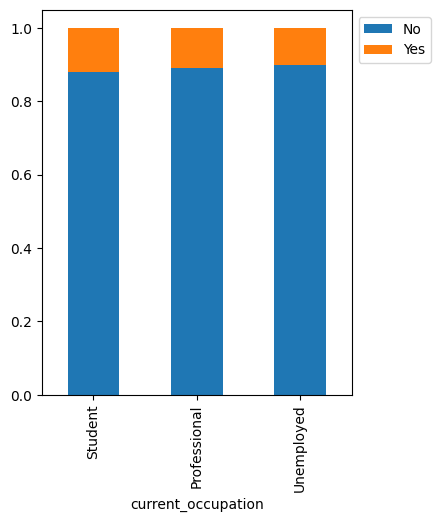

In [50]:
# newspaper
stacked_barplot(data, 'current_occupation', 'print_media_type1')

print_media_type2     No  Yes   All
current_occupation                 
All                 4379  233  4612
Professional        2473  143  2616
Unemployed          1376   65  1441
Student              530   25   555
------------------------------------------------------------------------------------------------------------------------


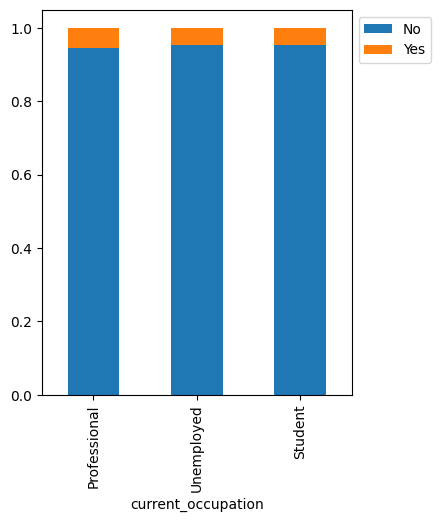

In [51]:
# Magazine
stacked_barplot(data, 'current_occupation', 'print_media_type2')

digital_media         No  Yes   All
current_occupation                 
All                 4085  527  4612
Professional        2300  316  2616
Unemployed          1288  153  1441
Student              497   58   555
------------------------------------------------------------------------------------------------------------------------


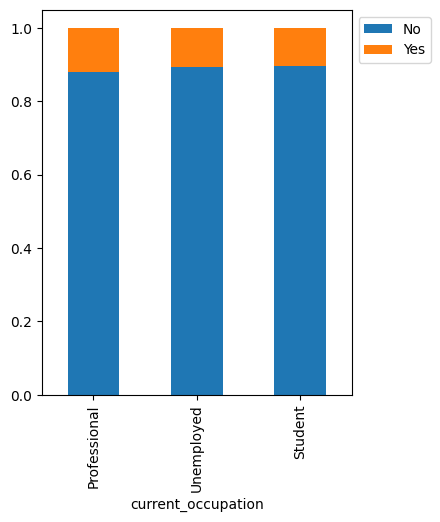

In [52]:
# Digital Media
stacked_barplot(data, 'current_occupation', 'digital_media')

educational_channels    No  Yes   All
current_occupation                   
All                   3907  705  4612
Professional          2204  412  2616
Unemployed            1232  209  1441
Student                471   84   555
------------------------------------------------------------------------------------------------------------------------


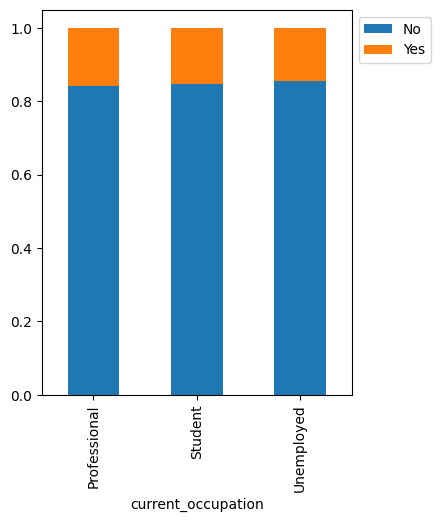

In [53]:
# Educational Channels
stacked_barplot(data, 'current_occupation', 'educational_channels')

**Observations**:

*   As we can see, there is no a true pattern or a high impact on the occupation and the different channels where the leads are seeing the ads. In general, the ratio is very similar between all channels and all the occupations




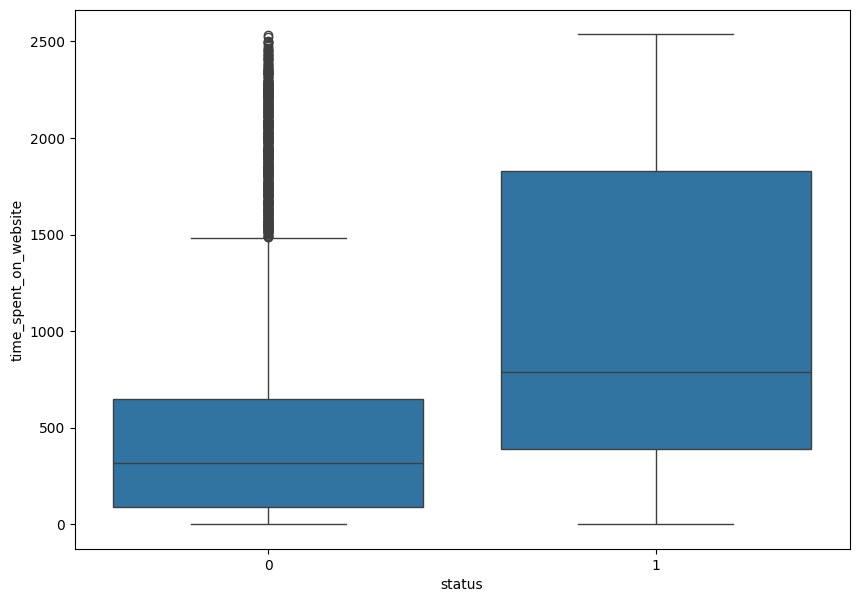

In [54]:
plt.figure(figsize=(10, 7))
sns.boxplot(data = data, x = "status", y = "time_spent_on_website")
plt.show()

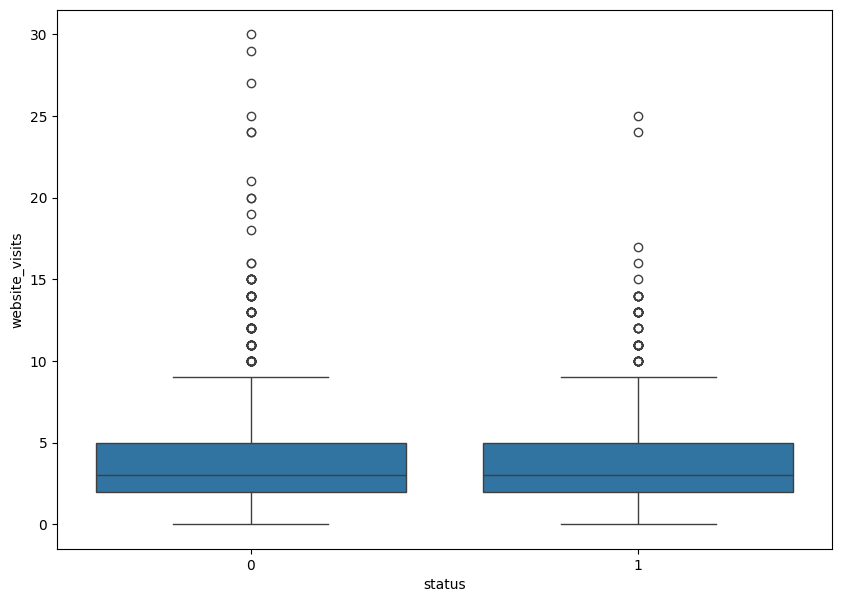

In [55]:
plt.figure(figsize=(10, 7))
sns.boxplot(data = data, x = "status", y = "website_visits")
plt.show()

####EDA OBSERVATIONS:

*   The target variable status is umbalance with the following ratio
    * 70% No
    * 30% Yes
*   Based on the current_occupation we can say the following
  * Professional
      * Leads' top occupation with 56%
      * Has the highest conversion rate with 35%
      * Is the only leads occupation in the age range of 26-31 years old
      * Has the broader distribution based on the age of the leads starting on 25 years until 60 years old
      * This occupation has a high and medium profile completed of ~49% each and only the 2% low profile completed
  * Unemployed
      * Is the second occupation of the leads with 31%
      * Second conversion rate with 26%
      * Is the only leads occupation in the age range of 61-63 years old
      * The leads with this occupation has a high and medio profile completed of ~49% each and only 2% of low profile completed
  * Student
      * The lowest occupation of the leads with 12%
      * Lowest conversion rate with only 11%
      * The youngest leads belongs to this cohort between the ages of 18-24 years old
      * These leads has 50% of high profile completed, 46% medium and 2% low

* The ages between 56-60 years are the top 5 paid leads
* The ages of 53,50 and 34 are the top 3 ages in conversion rate with 43%, 43% and 41%

Based on the first_interaction channel, we identified
* The leads distribution is 55% for website and 45% for mobile app
* Website has the highest conversion rate with 46%
* Mobile app has only a conversion rate of 10%

Related to last_activity that are the different interaction modes with the company, we found the following
* Email is the top with almost 50% of the total leads distribution, followed by phone 27% and website with 24%
* But the conversion rate is lead by website with 38%, follwed by email 30% and phone 20%


If we talk about the marketing channels used by the company to promote the courses, we found that
* The leads mentioned that saw an ad in the following channels
    * 705 mentioned they saw an ad on educational channels
    * 527 saw the ad on digital media
    * 497 saw the ad on newspaper
    * 233 saw the ad on Magazine
* 2943 leads didn't see an ad on any of these 4 channels this represent 63% of the total number of leads
    * 874 of these leads which is the 30% of them were converted to paid leads
    * This represent the 63% of the total paid leads
* The leads that mentioned saw the ad in the related channel has a  conversion rate of
    * Magazine 32%
    * Newspaper 31%
    * Digital Media 31%
    * Educational Channel 27%

Even when we mentioned the conversion rate by each current_occupation it is important to mention that
* Leads with a high percentaje of the profile completed has a conversion rate of 41%
* Medium profile completed conversion rate is 20%
* Low profile completed conversion rate is only 7%
* The first_interaction channel (website or Mobile App) do not have an influence to complete the profile information. We saw that in both cases, aprox 48% of the leads has high or medium profile completed and only 2% of low

We did the analysis of the referral attribute and we found that
* 93 leads heard about the company  through reference
* 63 of those 93 leads convert to paid lead, this represent the 67% of this cohort


We identified outliers on
* website visits
    * aprox 154 observations are outliers over the max limit, these observations represent the 3.3% of the total number of observations in the dataset
    * The correlation with the status is -0.007
* page_views_per_visit
    * aprox 260 observations are outliers over the max limit, these observations represent the 5.6% of the total number of observations in the dataset
    * The correlation with the status is 0.000

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [56]:
data = df.copy()

In [57]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.06,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91,Email Activity,No,No,No,No,No,0


In [58]:
# Remove the ID column as mentioned before, because it won't add value to the model since it is a unique value per each observation in the dataset
data.drop('ID', axis=1, inplace=True)

In [59]:
# Creating dummy variables
# Dummies for current_occupation, first_interaction, last_activity
convert_to_dummies = ['current_occupation', 'first_interaction', 'last_activity']
data = pd.get_dummies(data = data, columns = convert_to_dummies, drop_first = True, dtype=int)

In [60]:
# convert to binary 1/0 print_media_type1, print_media_type2, digital_media, educational_channels, referral,profile_completed
dict_binary = {'Yes': 1, 'No': 0}
dict_profile = {'High': 2, 'Medium': 1, 'Low': 0}

data['print_media_type1'] = data['print_media_type1'].map(dict_binary)
data['print_media_type2'] = data['print_media_type2'].map(dict_binary)
data['digital_media'] = data['digital_media'].map(dict_binary)
data['educational_channels'] = data['educational_channels'].map(dict_binary)
data['referral'] = data['referral'].map(dict_binary)
data['profile_completed'] = data['profile_completed'].map(dict_profile)


In [61]:
data.head()

,age,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,last_activity_Phone Activity,last_activity_Website Activity
0,57,2,7,1639,1.86,1,0,1,0,0,1,0,1,1,0,1
1,56,1,2,83,0.32,0,0,0,1,0,0,0,0,0,0,1
2,52,1,3,330,0.07,0,0,1,0,0,0,0,0,1,0,1
3,53,2,4,464,2.06,0,0,0,0,0,1,0,1,1,0,1
4,23,2,4,600,16.91,0,0,0,0,0,0,1,0,1,0,0


**NOTE**:

Based on the analysis we did it during the EDA phase, we can conclude that removing the outliers identified on the columns website_visits and page_views_per_visit won't impact the dataset because

*   The percentage of rows is low 3% and 5%
*   The correlation between these two columns and the target variable is negligible

I will create a secondary Dataframe to compare the model performance with and without these outliers


In [62]:
data_no_outliers = data.copy()

In [63]:
# Remove outliers for website_visits and page_views_per_visit
Q1 = data_no_outliers['website_visits'].quantile(0.25)
Q3 = data_no_outliers['website_visits'].quantile(0.75)
IQR = Q3 - Q1
outliers = data_no_outliers[(data_no_outliers['website_visits'] < (Q1 - 1.5 * IQR)) | (data_no_outliers['website_visits'] > (Q3 + 1.5 * IQR))]
data_no_outliers = data_no_outliers.drop(outliers.index)

In [64]:
Q1 = data_no_outliers['page_views_per_visit'].quantile(0.25)
Q3 = data_no_outliers['page_views_per_visit'].quantile(0.75)
IQR = Q3 - Q1
outliers = data_no_outliers[(data_no_outliers['page_views_per_visit'] < (Q1 - 1.5 * IQR)) | (data_no_outliers['page_views_per_visit'] > (Q3 + 1.5 * IQR))]
data_no_outliers = data_no_outliers.drop(outliers.index)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [65]:
data.shape, data_no_outliers.shape

((4612, 16), (4208, 16))

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4612 non-null   int64  
 1   profile_completed               4612 non-null   int64  
 2   website_visits                  4612 non-null   int64  
 3   time_spent_on_website           4612 non-null   int64  
 4   page_views_per_visit            4612 non-null   float64
 5   print_media_type1               4612 non-null   int64  
 6   print_media_type2               4612 non-null   int64  
 7   digital_media                   4612 non-null   int64  
 8   educational_channels            4612 non-null   int64  
 9   referral                        4612 non-null   int64  
 10  status                          4612 non-null   int64  
 11  current_occupation_Student      4612 non-null   int64  
 12  current_occupation_Unemployed   46

In [67]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00,46.20,13.16,18.00,36.00,51.00,57.00,63.00
profile_completed,4612.00,1.47,0.54,0.00,1.00,1.00,2.00,2.00
website_visits,4612.00,3.57,2.83,0.00,2.00,3.00,5.00,30.00
time_spent_on_website,4612.00,724.01,743.83,0.00,148.75,376.00,1336.75,2537.00
page_views_per_visit,4612.00,3.03,1.97,0.00,2.08,2.79,3.76,18.43
print_media_type1,4612.00,0.11,0.31,0.00,0.00,0.00,0.00,1.00
print_media_type2,4612.00,0.05,0.22,0.00,0.00,0.00,0.00,1.00
digital_media,4612.00,0.11,0.32,0.00,0.00,0.00,0.00,1.00
educational_channels,4612.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00
referral,4612.00,0.02,0.14,0.00,0.00,0.00,0.00,1.00


The data looks consistent to the expected result after the manipulation we did. Now, we will proceed to prepare the train and test datasets

In [68]:
X = data.drop('status', axis=1)
y = data['status']

In [69]:
X_no_outliers = data_no_outliers.drop('status', axis=1)
y_no_outliers = data_no_outliers['status']

In [70]:
# as we saw during the EDA phase, the target variable is umbalanced around 70-30, for that reason we will use the parameter stratify
# Doing this, will help us that  class frequencies are approximately preserved in each train and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size = 0.3, random_state = 1, stratify = y_no_outliers)

**Model evaluation criterion**

Model can make wrong predictions as:

*   Forecasting that a lead won't become a paying customer, but in reality, the lead would have converted into a paying customer

*   Forecasting that a lead will become a paying customer, when in fact, the lead does not convert to a paying customer.

Impact of each case?

*   In the first scenario, we are in risk of lose a potential customer.

*   In the second scenario, the company is in risk of allocate resources with a lead that won't convert.

Our confusion Matrix is:
```
*   Predict conversion, actual converted       = True Positive
*   Predict conversion, actual not converted   = False Positive
*   Predict no conversion, actual converted    = False Negative
*   Predict No Conversion, actual no converted = True Negative
```

**The important use case for the company it's to avoid loosing customers, so we need to decrease the number of false Negative cases meaning that we need to increase the recall.**

In [71]:
# We will reuse this function to calculate and print classification report and confusion matrix
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Building a Decision Tree model

In [72]:
model_decision_tree =  DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=42)
model_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



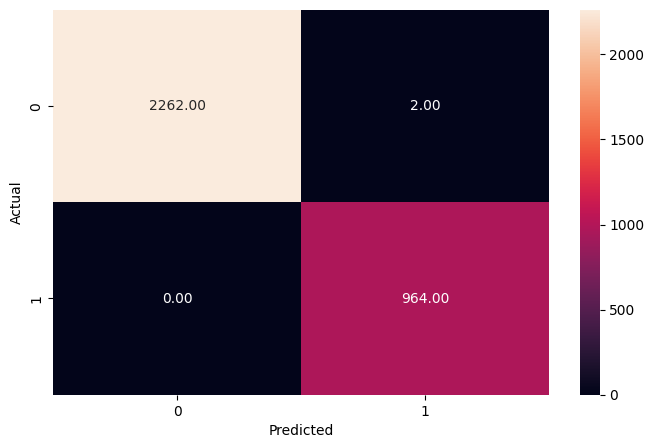

In [73]:
y_train_pred = model_decision_tree.predict(X_train)
metrics_score(y_train, y_train_pred)

**Observation**:


*   This initial model is giving a 100% score for all the metrics on the training Dataset

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       971
           1       0.66      0.63      0.64       413

    accuracy                           0.79      1384
   macro avg       0.75      0.74      0.75      1384
weighted avg       0.79      0.79      0.79      1384



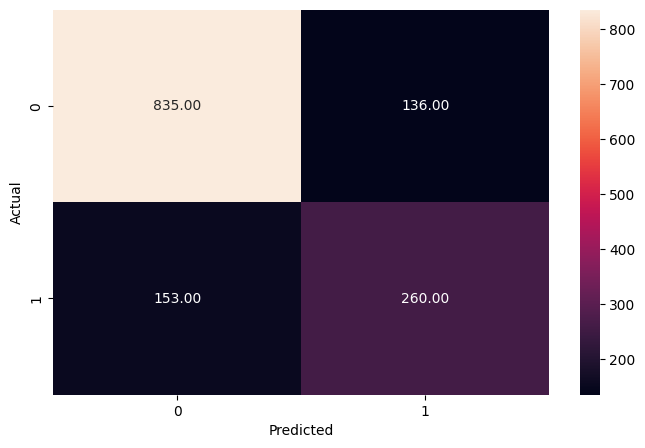

In [74]:
# Checking performance on the test dataset
y_test_pred_dt = model_decision_tree.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

**Observations**:


*   This initial model is performing well on the Train data but the performance with Test data is poor.
*   This model is overfitting
*   The recall is for train 1.0 and for test 0.63. this is a clear indicative that the model is overfitting the train data



<Axes: xlabel='Importance', ylabel='None'>

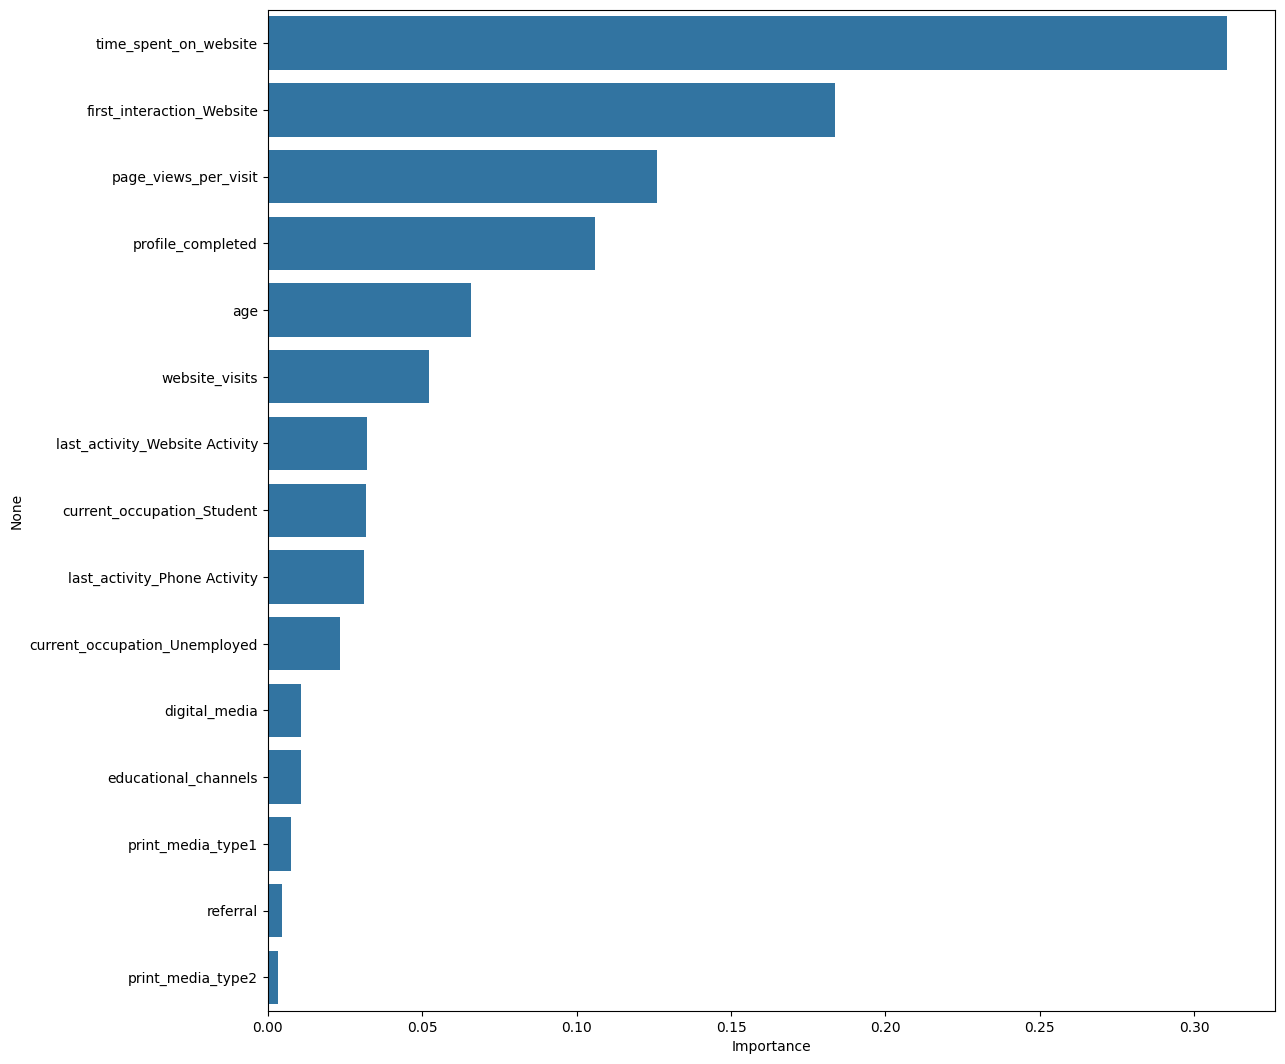

In [75]:
# Let's plot the feature importance
importances = model_decision_tree.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

Based on this Features importance plot:

*    Time_spent_on_website is the most important feature, followed by first_interaction_website and page_views_per_visit
*    This could mean that increasing the engagement of the users in the website will increase the conversion rate to paid leads.
    * More time spent on website and more pages visited per visit it's equal to better user engagement
* Features like the marketing channels (newspaper, magazine, digital, etc) or referral has a lower impact in the conversion rate  

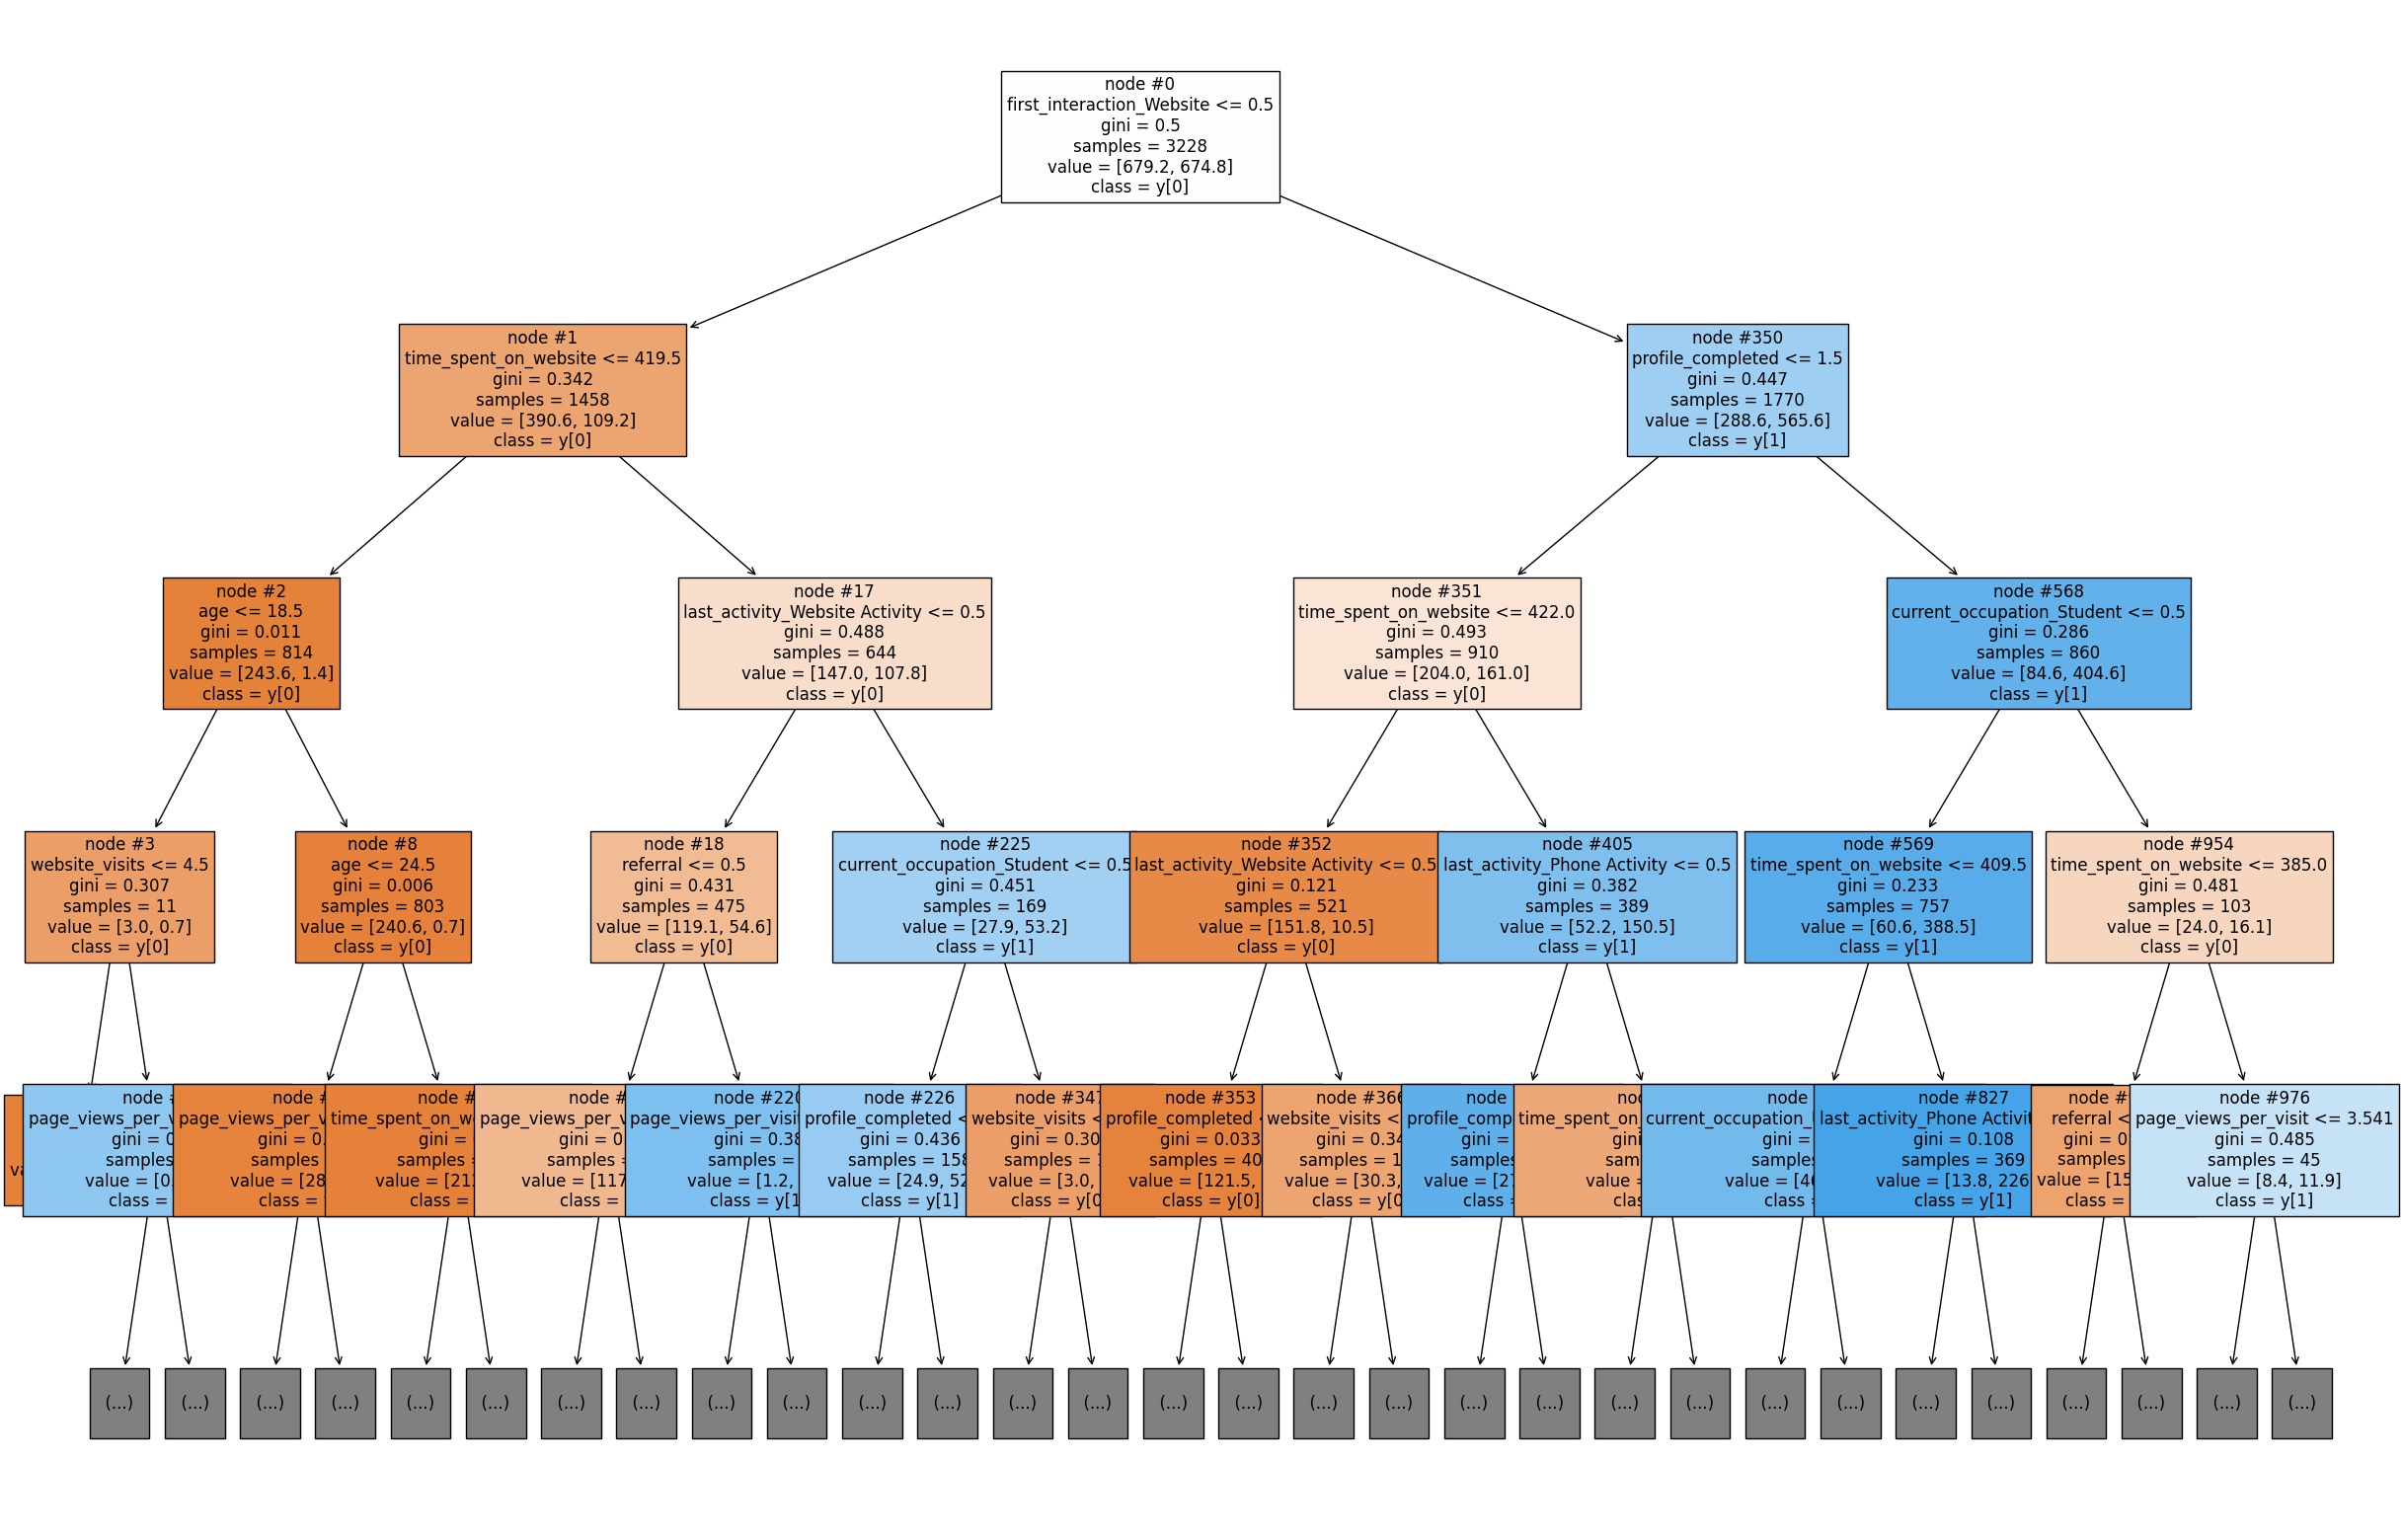

In [76]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(model_decision_tree, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

Blue leaves represent the lead conversion to paid y[1] which is Status = 1 or paid lead




---



In [77]:
# Now I will do the same steps but using the dataset without the outliers identified during the EDA
model_decision_tree_NO =  DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=42)
model_decision_tree_NO.fit(X_train_no_outliers, y_train_no_outliers)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2057
           1       1.00      1.00      1.00       888

    accuracy                           1.00      2945
   macro avg       1.00      1.00      1.00      2945
weighted avg       1.00      1.00      1.00      2945



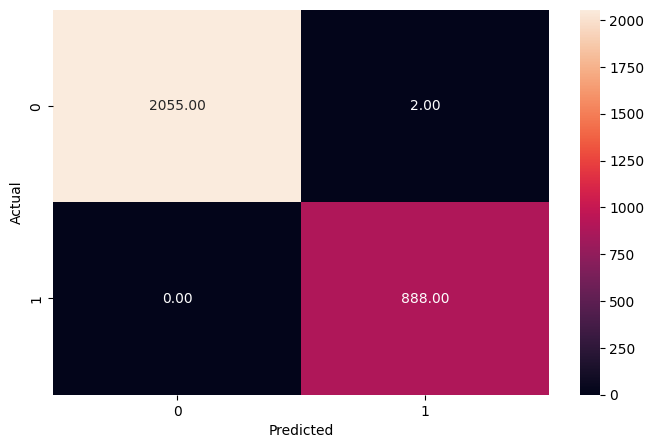

In [78]:
y_train_pred_NO = model_decision_tree_NO.predict(X_train_no_outliers)
metrics_score(y_train_no_outliers, y_train_pred_NO)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       882
           1       0.69      0.70      0.70       381

    accuracy                           0.81      1263
   macro avg       0.78      0.78      0.78      1263
weighted avg       0.82      0.81      0.82      1263



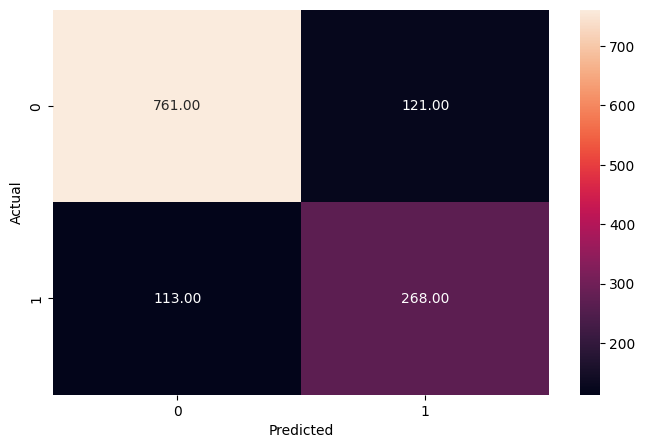

In [79]:
# Checking performance on the test dataset
y_test_pred_dt_NO = model_decision_tree_NO.predict(X_test_no_outliers)
metrics_score(y_test_no_outliers, y_test_pred_dt_NO)

<Axes: xlabel='Importance', ylabel='None'>

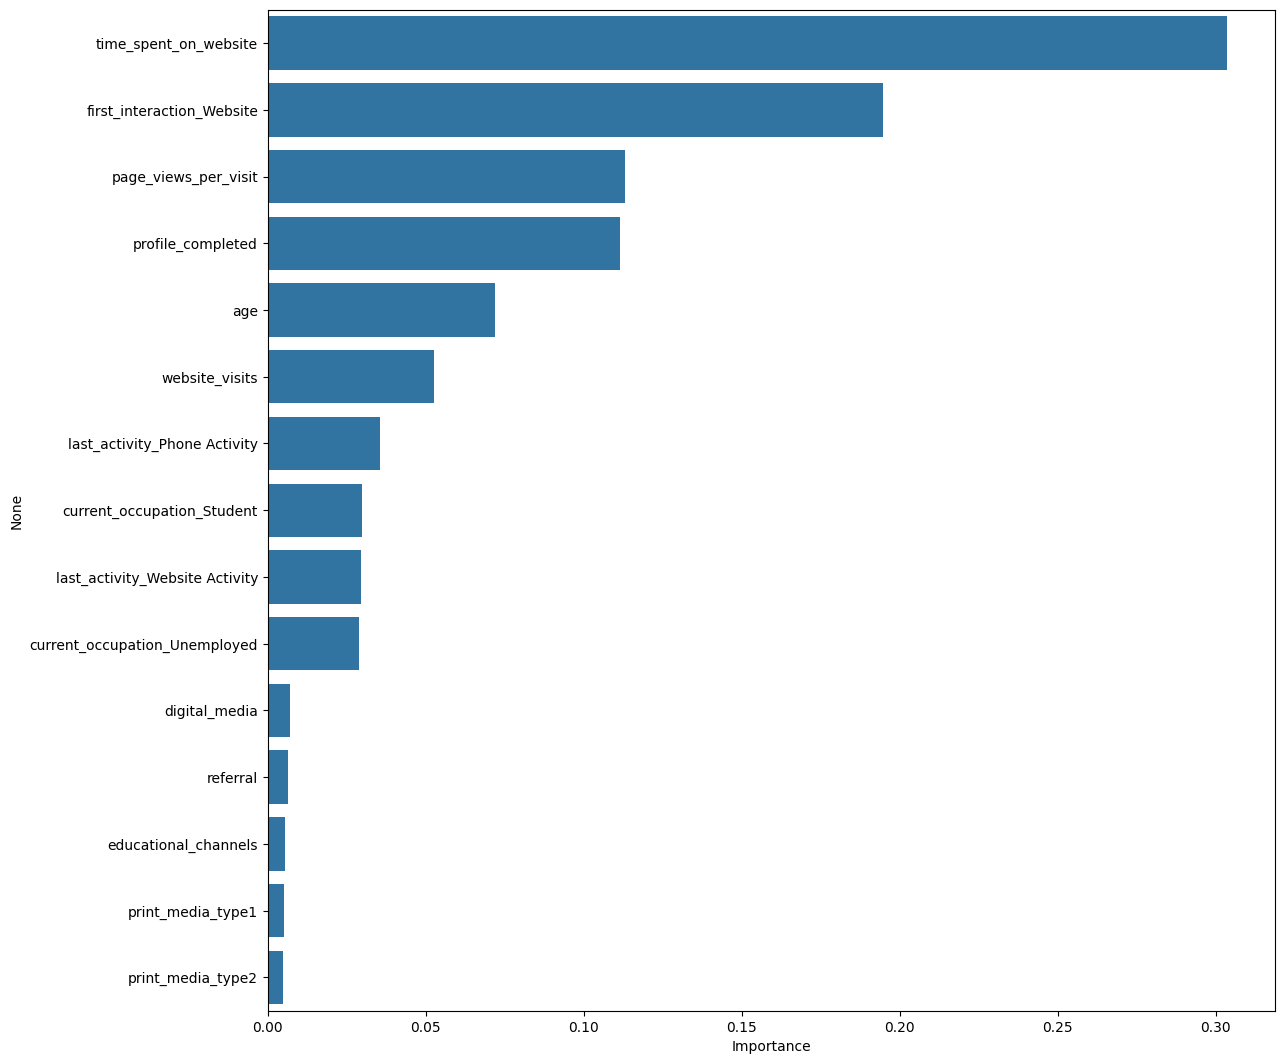

In [80]:
# Let's plot the feature importance
importances_NO = model_decision_tree_NO.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances_NO, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

**Observations**:


*   When testing the decision tree with the dataset in which we removed the outliers, we can see a sligthly increase in the recall performance from 0.63 to 0.70
*   We still see the overfitting on the train data
*   The feature importance remain very similar with the most important features time_spent+on_website, first_interaction_website and page_views_per_visit
*   Marketing channels remain in the lower features importances
*   Basically, no big changes or difference with or without outliers



---



In [81]:
# Now we want to tune the DecisionTreeClassifier model touching the hyperparameters
decisiontree_hyp = DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=42)


# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(decisiontree_hyp, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
decisiontree_hyp = gridCV.best_estimator_

# Fit the best estimator to the data
decisiontree_hyp.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=42)

              precision    recall  f1-score   support

           0       0.95      0.76      0.84      2264
           1       0.61      0.90      0.73       964

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.78      3228
weighted avg       0.85      0.80      0.81      3228



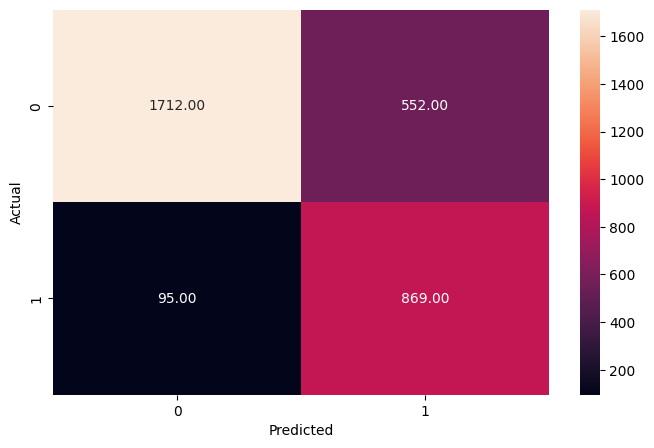

In [82]:
y_train_tune = decisiontree_hyp.predict(X_train)
metrics_score(y_train, y_train_tune)

**Observations**:

*   The new model with tuned hyperparameters showed a better performance.
*   We will run it with the test data and confirm if we removed the overfitting




              precision    recall  f1-score   support

           0       0.94      0.75      0.83       971
           1       0.60      0.88      0.71       413

    accuracy                           0.79      1384
   macro avg       0.77      0.82      0.77      1384
weighted avg       0.84      0.79      0.80      1384



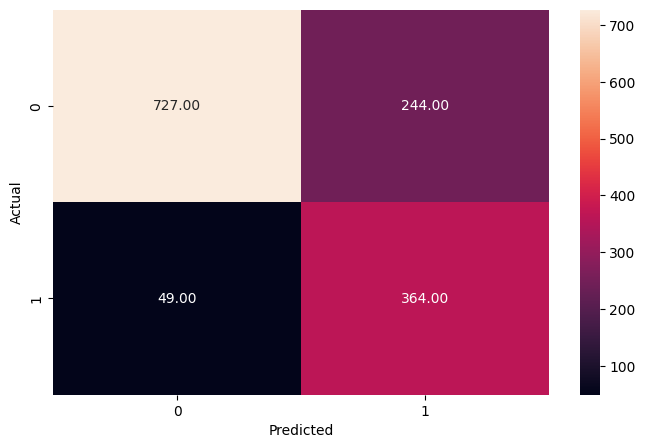

In [83]:
# Checking performance on the test dataset
y_test_tune = decisiontree_hyp.predict(X_test)
metrics_score(y_test, y_test_tune)

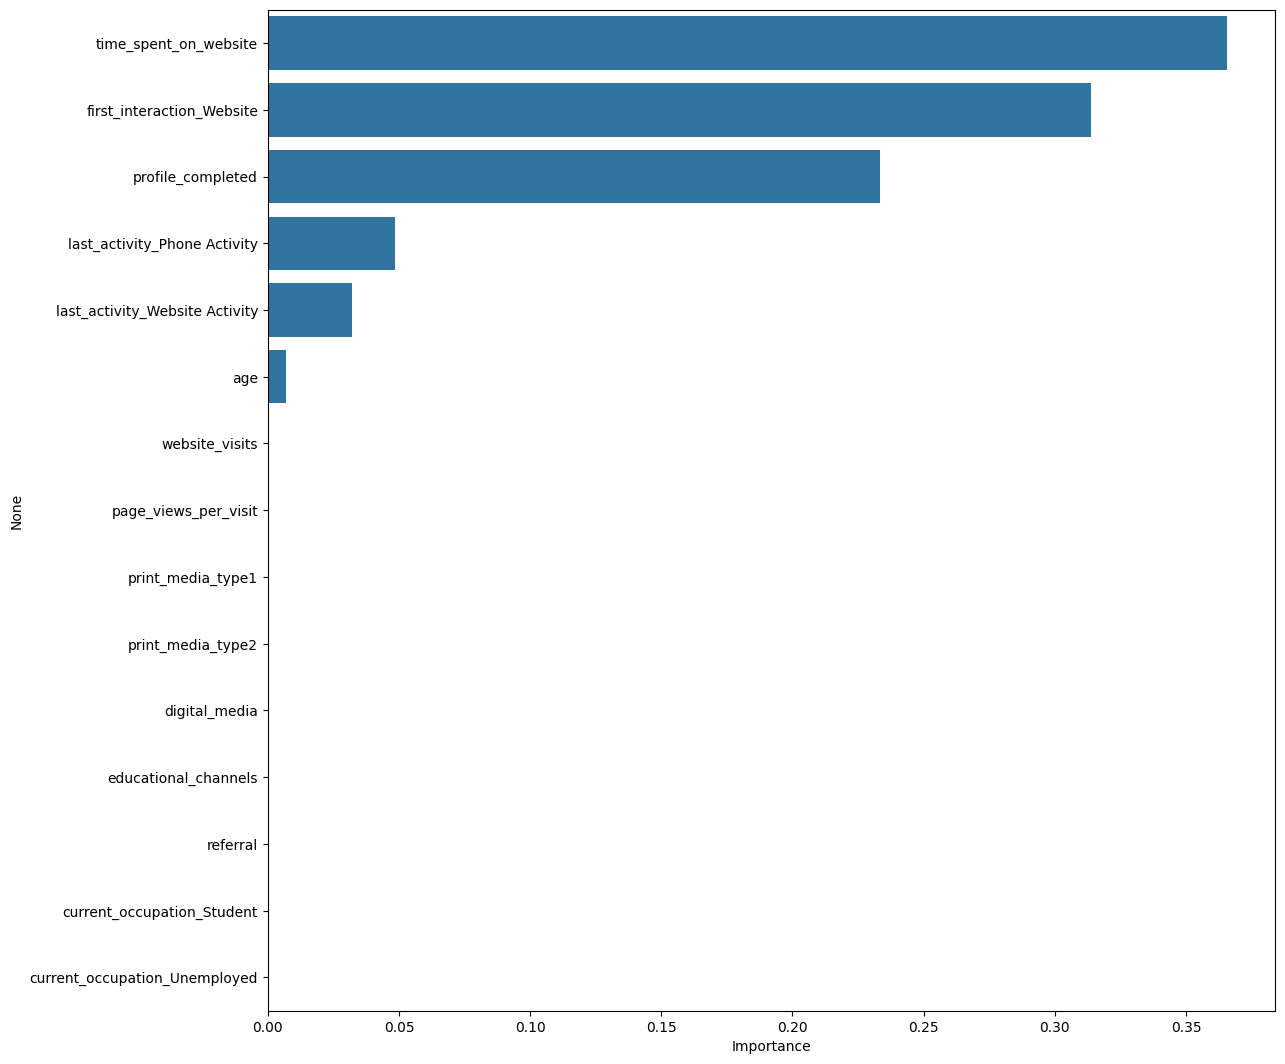

In [84]:
importances = decisiontree_hyp.feature_importances_
columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))
sns.barplot(data=importance_df, x='Importance', y=importance_df.index)
plt.show()

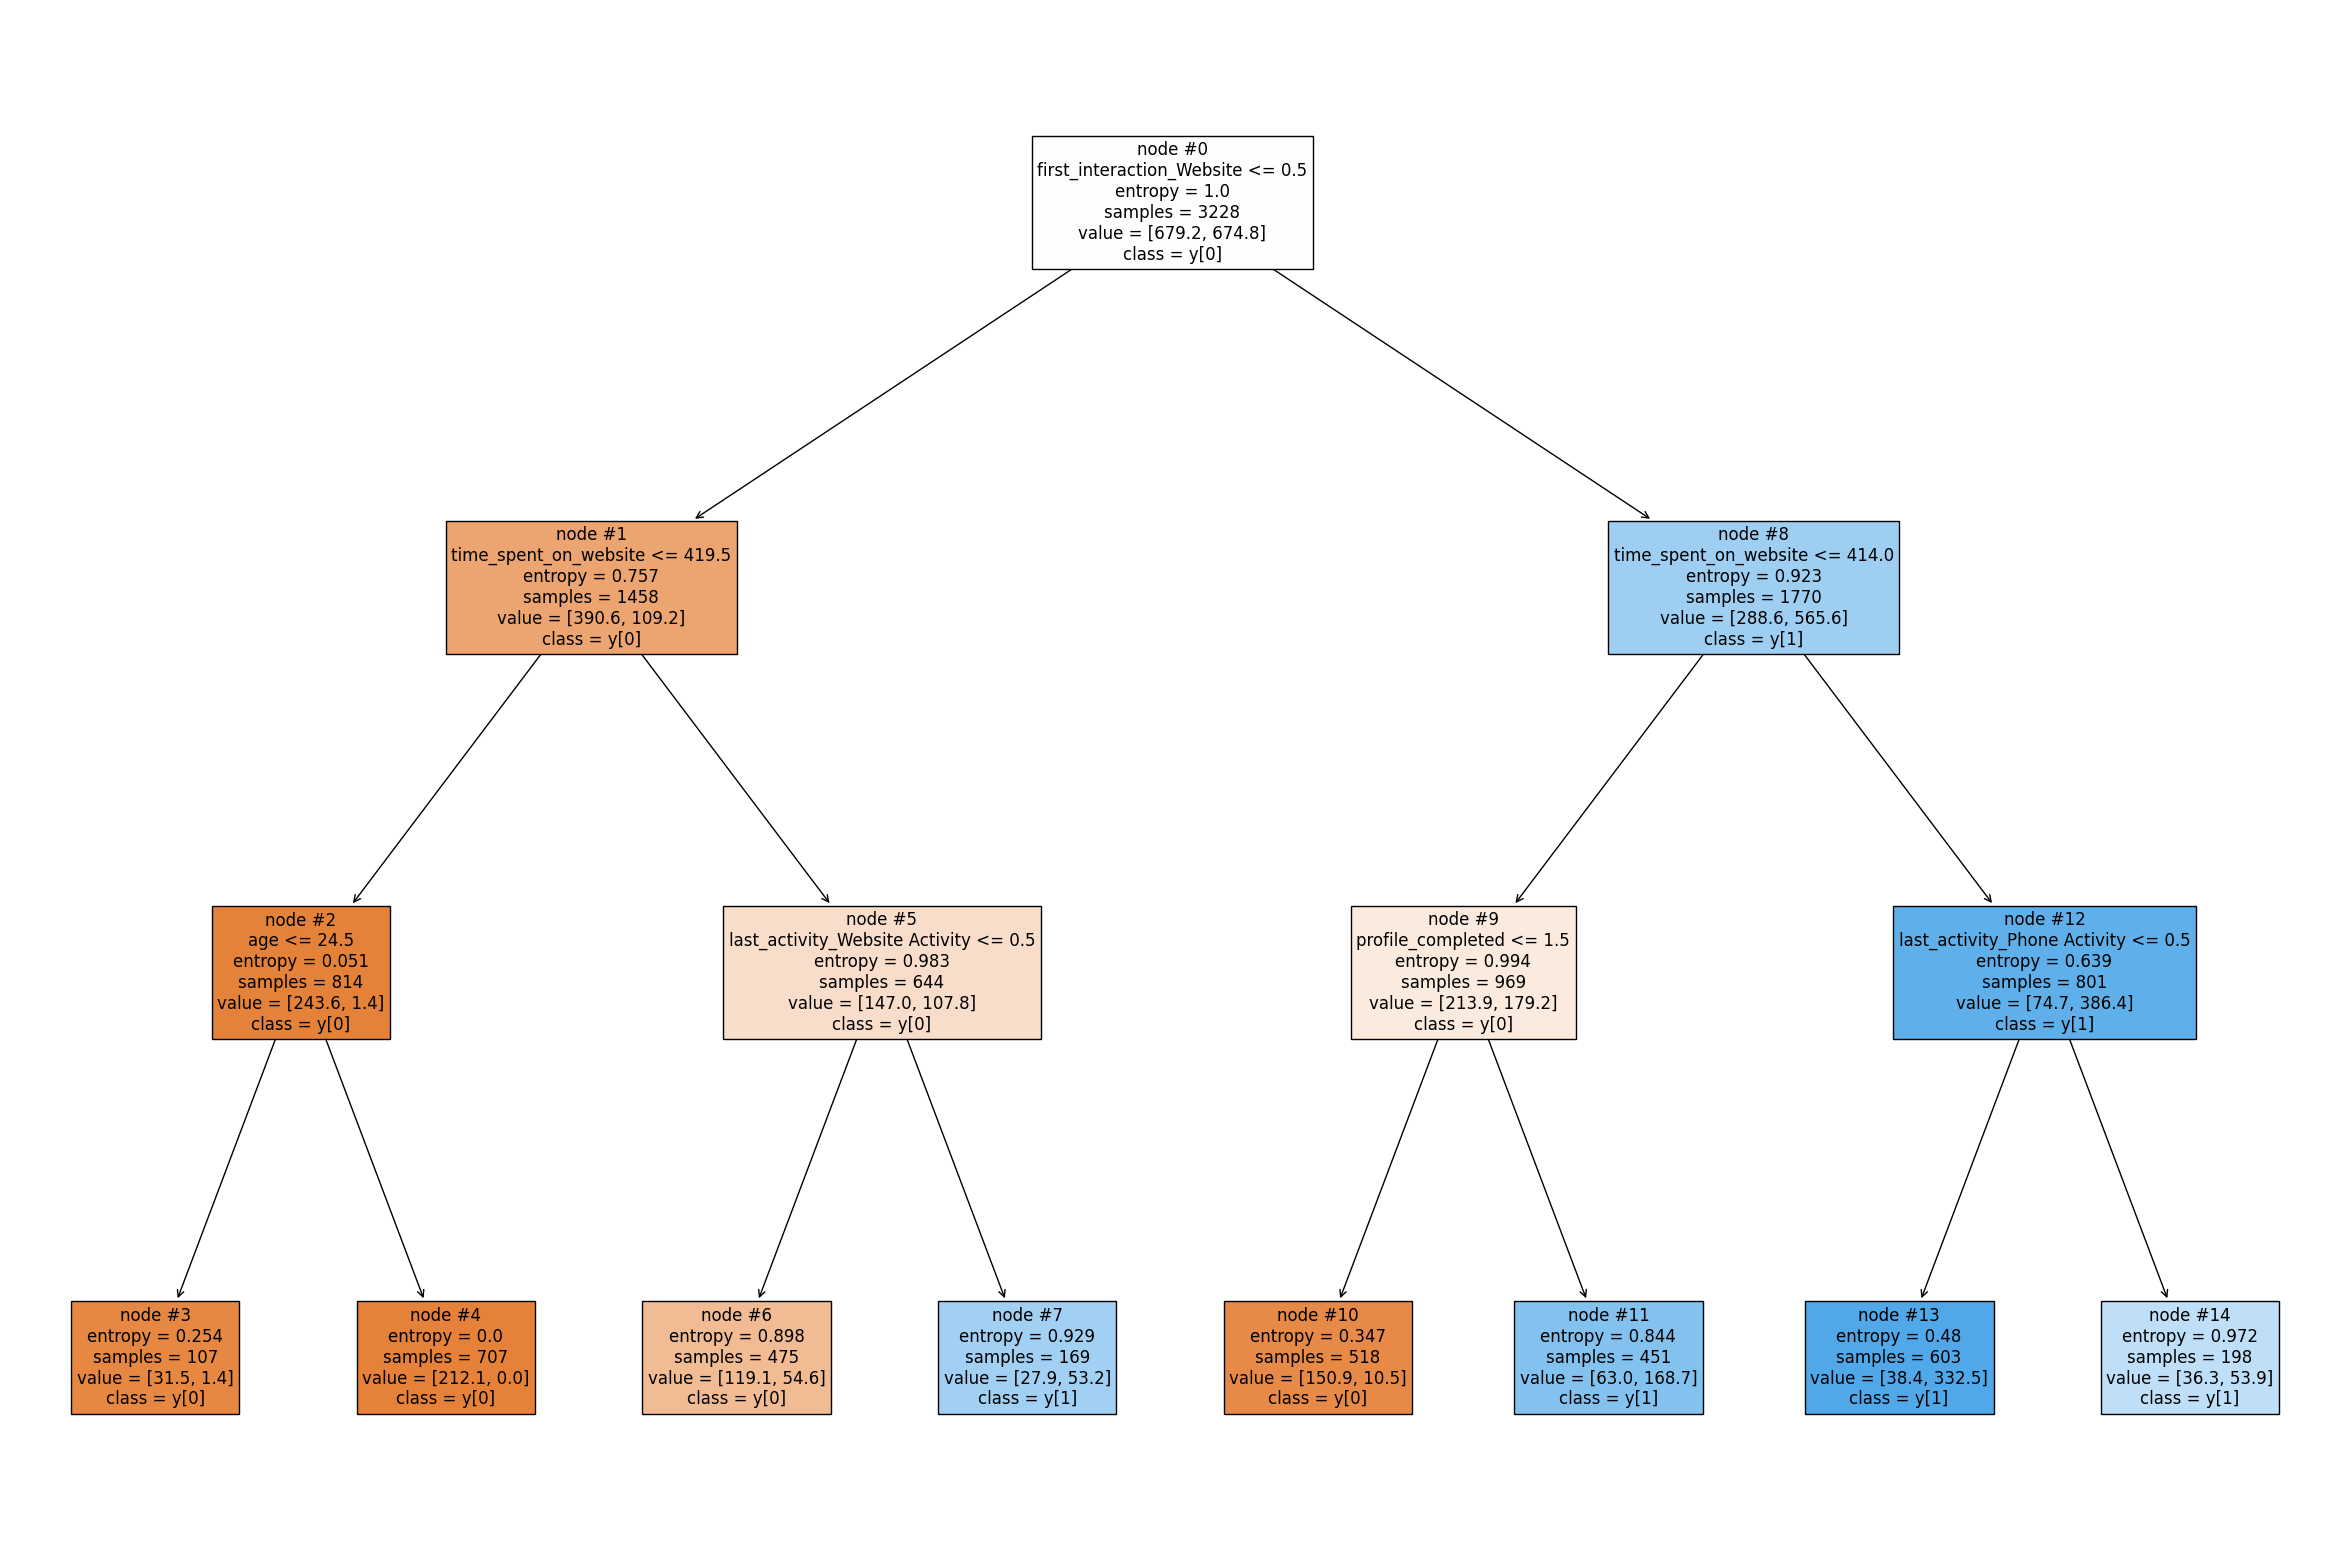

In [85]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(decisiontree_hyp, max_depth = 5, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

**Observations**:

*   The new tuned model provides better performance for the recall with 88%, the number of false Negatives went from 95 in the train to 49 in the test.
*   In the previous decision tree model the number of False Negative was 153
*   The top 3 feature importance are (in this order)
    *   time_spent_on_website
    *   first_interaction_website
    *   profile_completed
    *   We should understand that users with a better user engagement on the website, and with better percentage of the profile completed will lead to better conversion rate
*   So, we are seeing a better perfomance after tunning the hyperparameters





## Do we need to prune the tree?

**Observations:**

We run the decisionTreeClassifier without hyperparameters and we found signs of overfitting. Then we ran GridSearchCV and got the best_estimator_ to optimize the hyperparameters to prevent overfitting, including inherent pruning steps.

The reduced performance metrics reflect a more generalized model, balancing precision and recall across classes.

**How do we achieve the pruning?**

Using these hyperparameters
*     **max_depth=3**. Limits the maximim depth of the tree which prevent the model from becoming too complex and overfitting.
*     **min_samples_leaf=5**. This parameter helped us to specify the minimum number of samples that a leaf node must have. This prevents the model from creating leaf nodes that are too specific to small subsets of the data

These two hyperparameters *effectively prune* the tree limiting its growth and complexity.

## Building a Random Forest model

I will start with a RandomForestClassifier model just adding the class_weight parameter to reduced the umbalanced Target variable

In [86]:
model_randomForest = RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state = 1)

model_randomForest.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



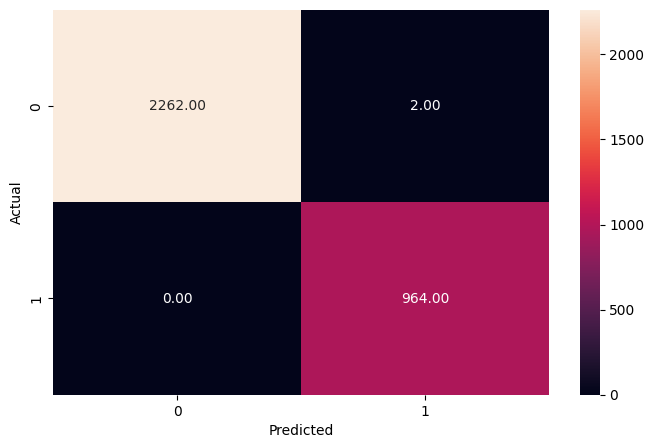

In [87]:
y_pred_train_randomForest = model_randomForest.predict(X_train)

metrics_score(y_train, y_pred_train_randomForest)

**Observations**:


*   We can see 1 on all the metrics Precision, Recall, F1-score and accuracy
*   We could have a overfitting situation based on these results, let's run the model with the test data and double check



              precision    recall  f1-score   support

           0       0.88      0.92      0.90       971
           1       0.79      0.72      0.75       413

    accuracy                           0.86      1384
   macro avg       0.84      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



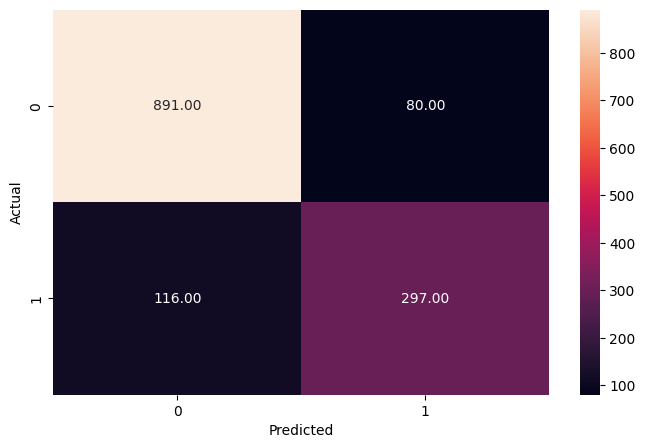

In [88]:
y_pred_test_randomForest = model_randomForest.predict(X_test)

metrics_score(y_test, y_pred_test_randomForest)

**Observations**:

*   The model performance is much lower in test that with training data, this is an indicative that the model is overfitting on training data and not doing well with unseen data.
*   We can reduce the overfitting and improve recall with hyperparameters tunning



<Axes: title={'center': 'Feature Importances'}, xlabel='Importance', ylabel='None'>

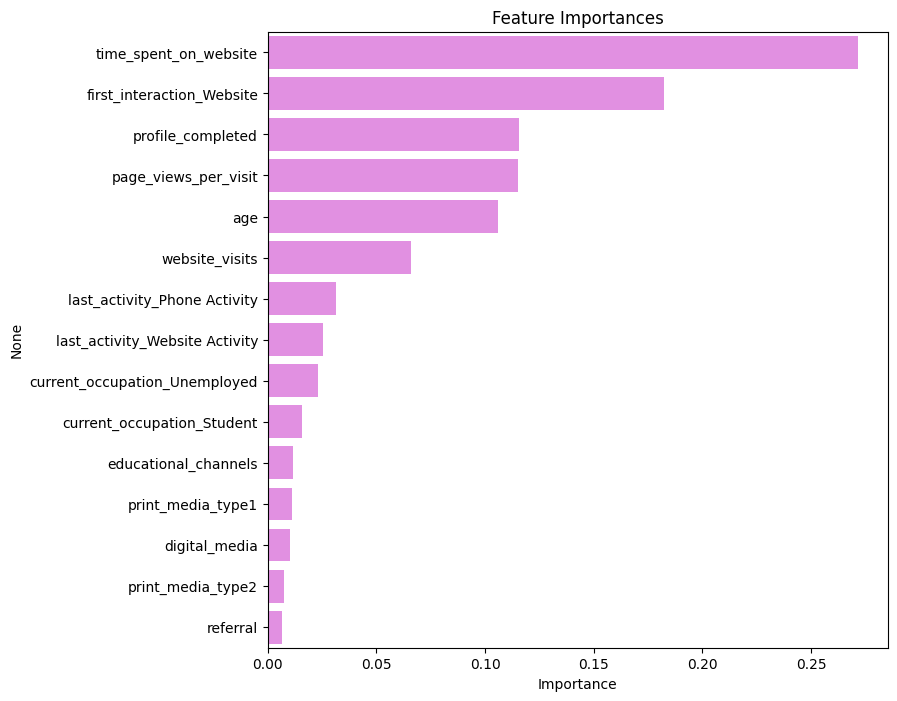

In [89]:
importances = model_randomForest.feature_importances_
columns = X_train.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
sns.barplot(x = importance_df.Importance, y = importance_df.index, color="violet")

**Observations**:

*   The most important features are time_spent_on_website, first_interaction_website and profile_completed/page_views_per_visit
*   We can interpretate that user engagement in the website funnel the user to spent more time, complete the profie and visit more pages, that will lead to convert to paid leads




---

We will run RandomForestClassifier with the Dataset in which we removed the outliers and see the performance of it


In [90]:
model_randomForest_no_outliers = RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state = 1)
model_randomForest_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2057
           1       1.00      1.00      1.00       888

    accuracy                           1.00      2945
   macro avg       1.00      1.00      1.00      2945
weighted avg       1.00      1.00      1.00      2945



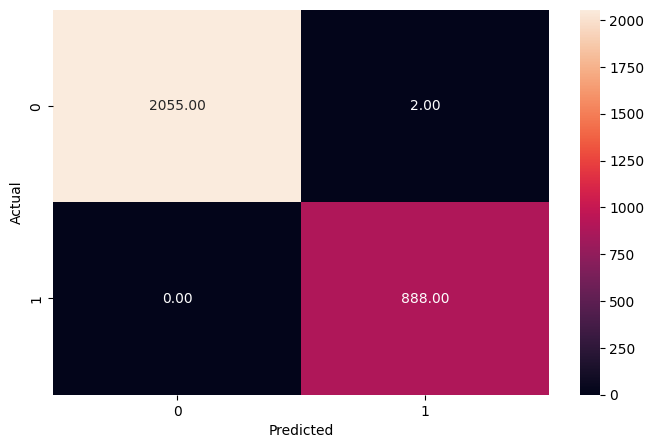

In [91]:
y_pred_train_randomForest_no = model_randomForest_no_outliers.predict(X_train_no_outliers)
metrics_score(y_train_no_outliers, y_pred_train_randomForest_no)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       882
           1       0.78      0.73      0.76       381

    accuracy                           0.86      1263
   macro avg       0.83      0.82      0.83      1263
weighted avg       0.86      0.86      0.86      1263



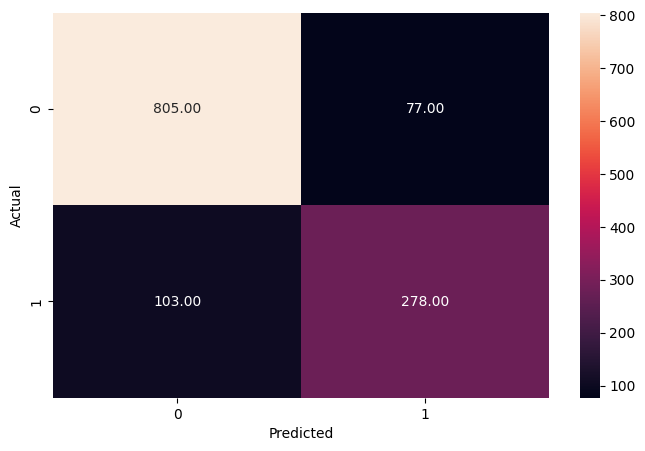

In [92]:
y_pred_test_randomForest_no = model_randomForest_no_outliers.predict(X_test_no_outliers)
metrics_score(y_test_no_outliers, y_pred_test_randomForest_no)

<Axes: title={'center': 'Feature Importances'}, xlabel='Importance', ylabel='None'>

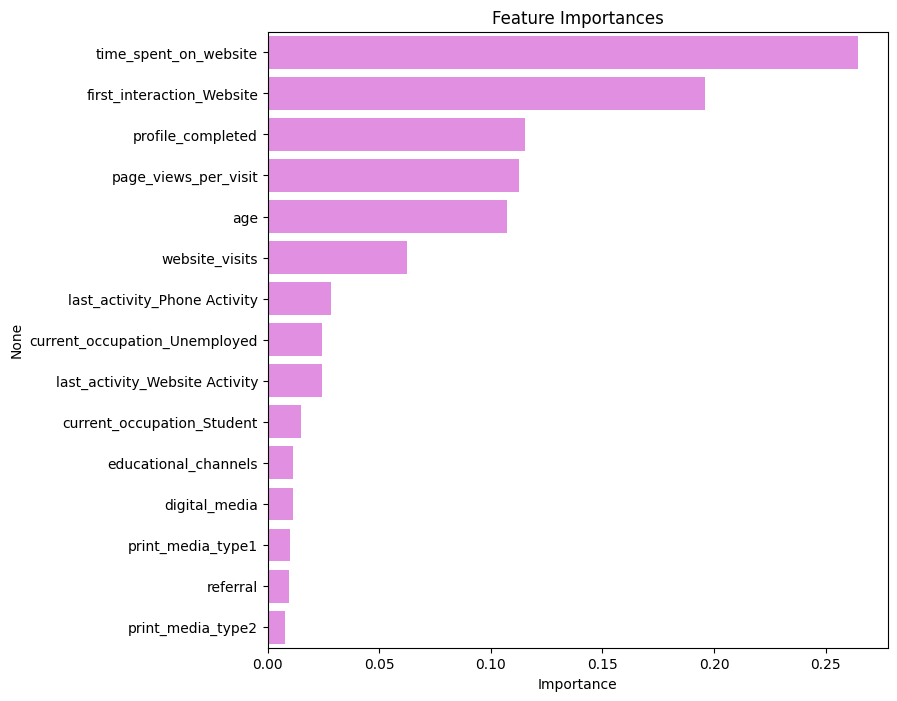

In [93]:
importances = model_randomForest_no_outliers.feature_importances_
columns = X_train.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
sns.barplot(x = importance_df.Importance, y = importance_df.index, color="violet")

**Observations**:

*   We can see a similar behavior as with DecisionTreeClassifier, the model when running with the test data is getting great performance metrics but when running with the test data the performance is not doing well clear indicator of overfitting
*   We can say that the outliers are not having an impact on the performance model due to the similariy with the previous models we ran.




---

Now, let's perform GridSearchCV to identify the best hyperparameters and run the model with them and see if the performace improves

In [94]:
# Choose the type of classifier
randomForest_estimator_tuned = RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
        "max_depth":[3,5,7]
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(randomForest_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
randomForest_estimator_tuned = grid_obj.best_estimator_

In [95]:
randomForest_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=3,
                       max_features=0.9, random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.76      0.84      2264
           1       0.61      0.90      0.73       964

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.85      0.80      0.81      3228



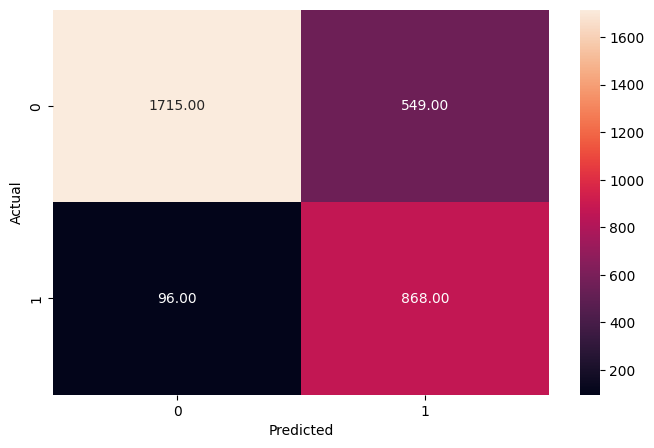

In [96]:
# Checking performance on the training data
y_pred_train_rf_tuned = randomForest_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train_rf_tuned)

**Observations**:

*   With the hypermeters we got a goot recall score of 96% with an accuracy of 95%.
*   The model is doing well with the train data

              precision    recall  f1-score   support

           0       0.94      0.75      0.83       971
           1       0.60      0.88      0.71       413

    accuracy                           0.79      1384
   macro avg       0.77      0.82      0.77      1384
weighted avg       0.84      0.79      0.80      1384



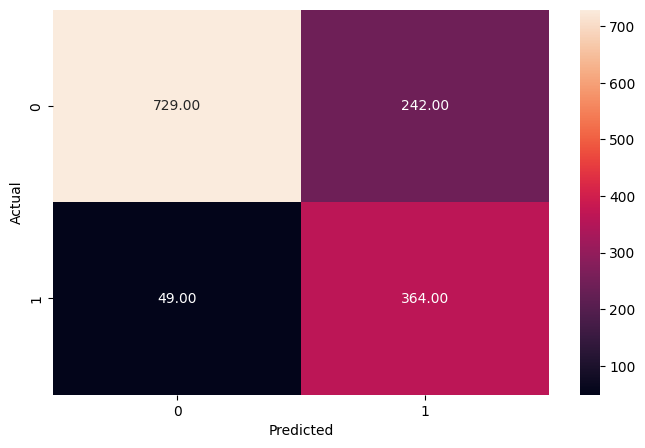

In [97]:
# Checking performance on the test data
y_pred_test_rf_tuned = randomForest_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_test_rf_tuned)

**Observations**:

*   We can see a very good performance of the model with a 90% recall on the Train data and 88% recall on test data.
*   We removed the overfitting and the model is providing good overall performance with a 79% of accuracy




<Axes: xlabel='Importance', ylabel='None'>

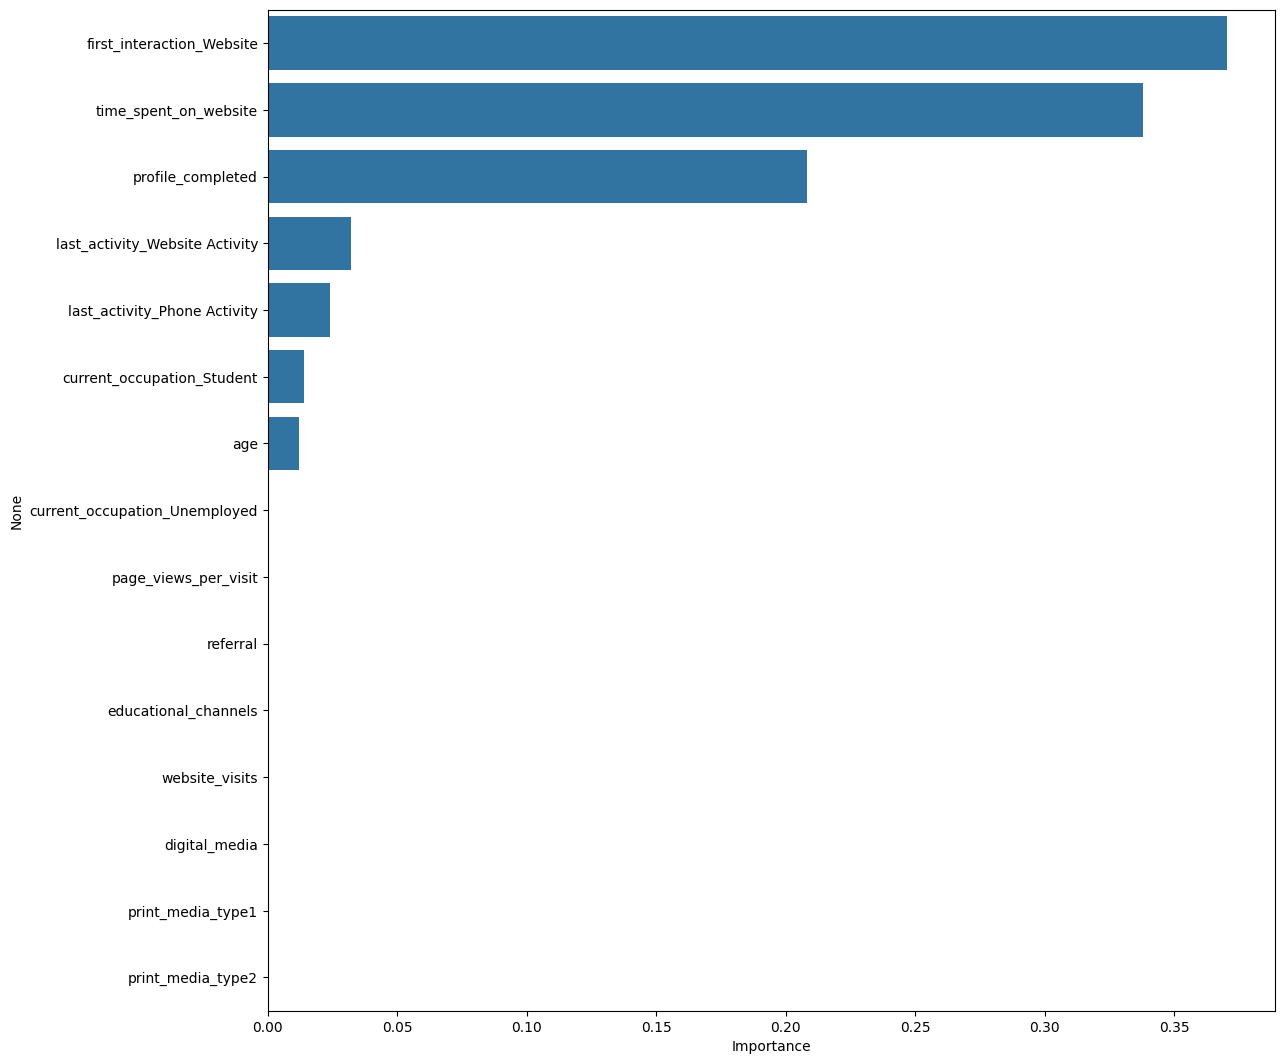

In [98]:
# Plotting feature importance
importances = randomForest_estimator_tuned.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

**Observations**:

*   In the case of the importance features, we can see that first_interaction_website, time_spent_on_website and profile_completed are the most important for this model
*   It is interesting to see in the chart that basically we have 7 out of 15 features are identified as the important for the mode, less than 50% of the features.


---
---
**We will remove the less important features and we will re-evaluate the model**



In [99]:
# we are taking the 7 most relevant features
X_train_7_features = X_train[['first_interaction_Website','time_spent_on_website','profile_completed','last_activity_Website Activity','last_activity_Phone Activity','current_occupation_Student','age']]
X_test_7_features = X_test[['first_interaction_Website','time_spent_on_website','profile_completed','last_activity_Website Activity','last_activity_Phone Activity','current_occupation_Student','age']]

In [100]:
# Choose the type of classifier
randomForest_estimator_7 = RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
        "max_depth":[3,5,7]
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(randomForest_estimator_7, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train_7_features, y_train)

# Set the classifier to the best combination of parameters
randomForest_estimator_7 = grid_obj.best_estimator_

In [101]:
randomForest_estimator_7.fit(X_train_7_features, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=3,
                       max_features=0.9, random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.76      0.84      2264
           1       0.61      0.90      0.73       964

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.85      0.80      0.81      3228



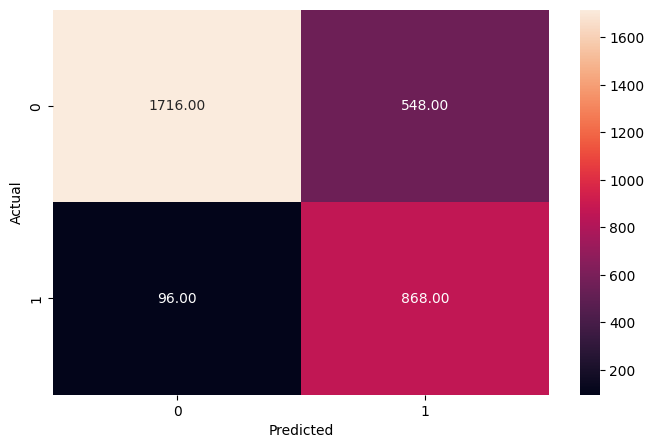

In [102]:
# Checking performance on the training data
y_pred_train_rf_tuned_7 = randomForest_estimator_7.predict(X_train_7_features)
metrics_score(y_train, y_pred_train_rf_tuned_7)

              precision    recall  f1-score   support

           0       0.94      0.75      0.83       971
           1       0.60      0.88      0.71       413

    accuracy                           0.79      1384
   macro avg       0.77      0.82      0.77      1384
weighted avg       0.84      0.79      0.80      1384



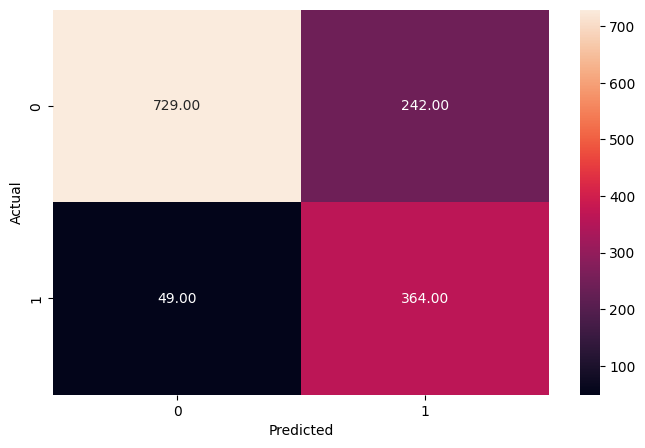

In [103]:
# Checking performance on the test data
y_pred_test_rf_tuned_7 = randomForest_estimator_7.predict(X_test_7_features)
metrics_score(y_test, y_pred_test_rf_tuned_7)

<Axes: xlabel='Importance', ylabel='None'>

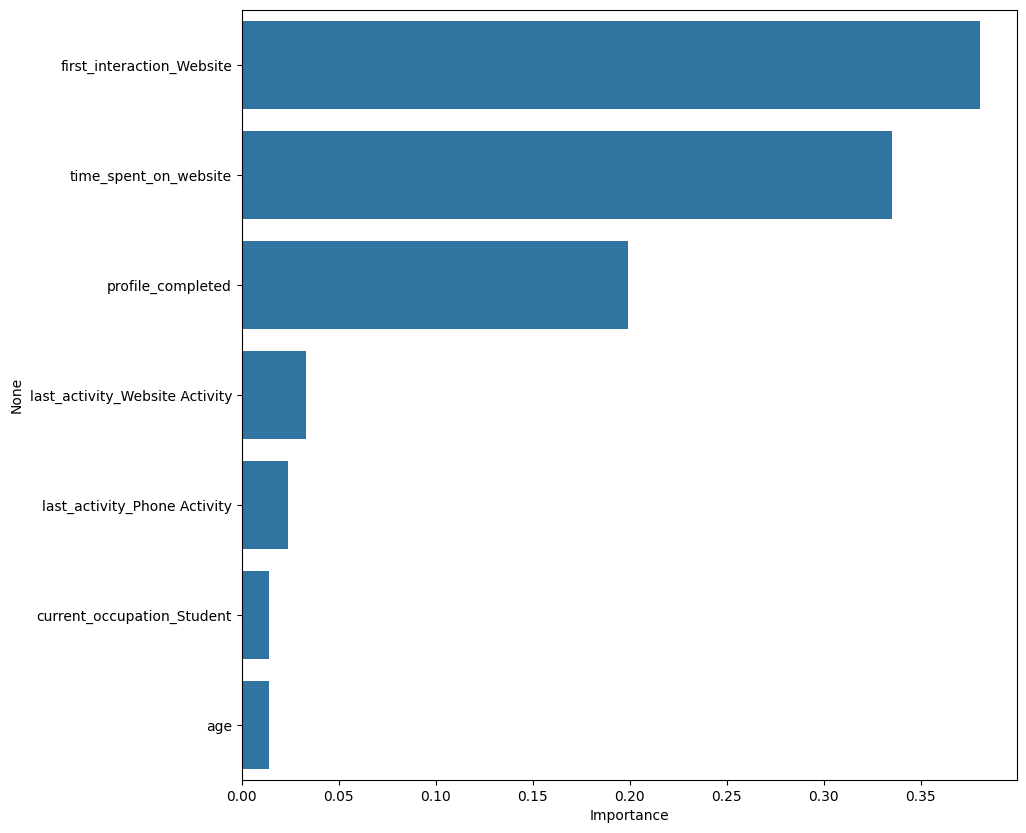

In [104]:
# Plotting feature importance
importances = randomForest_estimator_7.feature_importances_
columns = X_test_7_features.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (10, 10))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

**Observations**:

*   After removing the 8 less relevant features identified in the tunned random forest, we can see that the values are exactly the same. For that reason we can conclude
*   The features removed are likely redundant or irrelevant to the target variable
*   We can simplify the model with this feature reduction and we are not loosing performance
*   The model remain consistent after the removal of more than the half of the independendent features



## Do we need to prune the tree?

**Observations**:

We run the RandomForestClassifier without hyperparameters and we found signs of overfitting. Then we ran GridSearchCV and got the best_estimator_ to optimize the hyperparameters to prevent overfitting, including inherent pruning steps.

The reduced performance metrics reflect a more generalized model, balancing precision and recall across classes. Additionally, after identifying the More relevant features for the mode and removing the Less relevant, we confirmed that the model is still robust, provided the same performance with reduced complexity

**How do we achieve the pruning?**

Using these hyperparameters

*    **max_depth=3**. Limits the maximim depth of the tree which prevent the model from becoming too complex and overfitting.
*    **max_features=0.9** When this value is a float, we will use only a fraction of the total number of features in each split.  

The formula is
max_features = max(1, int(max_features * n_features_in_))
=0.9*7 = 6.3 = 6 features on each split


These two hyperparameters effectively prune the tree limiting its growth and complexity.



## Actionable Insights and Recommendations

###I will split this last part in 3 different sections



####Model
We ran different models and different approaches and these are our findings for the Recall and Precision values we got

| Model | Recall on Train | Recall on Test | Prec Train | Prec Test |
|---------|-------------------|------------------|-------------------|------------------|
| Decision Tree | 1 | 63 | 1 | 66 |
| Decision Tree without Outliers | 1 | 70 | 1 | 64 |
| Decision Tree Tunned | 90 | 88 | 61 | 60 |
| Random Forest | 1 | 72 | 1 | 74 |
| Random Forest without Outliers | 1 | 73 | 1 | 78 |
| Random Forest tunned | 90 | 88 | 61 | 60 |
| **Random Forest with 7 Features** | 90 | 88 | 61 | 60 |

Our recommendation for the business

**Model to Use**: Random Forest tunned with only 7 features

**Justification**:

*   Our Recall predicting accuracy is 88%. That is one of our goals in this project, identify as much as possible the number of leads that will convert and minimize the number of predicted leads that won't convert and at the end will be doing it (False Negatives)
*   Using less features will reduce complexity of the model  and ,computationally speaking, it will be cheaper for processing.

####Leads Profile
In this process we identify 3 main classifications for our Leads:

*	  Professional (This is our main Target)
    *	Leads' top occupation with 56%
    * Has the highest conversion rate with 35%
    *	Is the only leads occupation in the age range of 26-31 years old
    *	Has the broader distribution based on the age of the leads starting on 25 years until 60 years old
    *	This occupation has a high and medium profile completed of ~49% each and only the 2% low profile completed
*   Unemployed
    *	Is the second occupation of the leads with 31%
    *	Second conversion rate with 26%
    *	Is the only leads occupation in the age range of 61-63 years old
    *	The leads with this occupation has a high and medio profile completed of ~49% each and only 2% of low profile completed
*	  Student
    *	The lowest occupation of the leads with 12%
    *	Lowest conversion rate with only 11%
    *	The youngest leads belongs to this cohort between the ages of 18-24 years old
    *	These leads has 50% of high profile completed, 46% medium and 2% low



####Factors that will drive to conversion

Our Random Forest Model identify as the top 2 importance features
*   first_interaction_website
*   time_spent_on_website

The leads distribution indicated that 55% used as first interaction the website and is the website the platform with the highest conversion rate with 46%
Mobile performance is not too bad because it was used as first interaction for 45% of the leads but the conversion rate is only 10%

**Recommendation for the business**:

Since website is the platform that is having more traffic and the conversion rate is the highest
  *   The company should invest more on having good content related to the different programs available, easy to access and easy to download or print for the leads
  *   The website should be available all the time because is the first source of our income
  *   Providing more specific content we will increase the time spent on the webiste on our leads, which will derive in a higher conversion rate
  *   basically that we are saying is that improving the user engagement on our website will increase the conversion rate for the company
  *   The company needs to ensure that the process to complete the profile has the less possible friction. It should be easy to access, easy to complete and promote the sign up to the courses. As we saw during this analysis, people with profile completed Medium and High has a conversion rate of aprox 61%. So this is an important website feature that the company needs to pay attention.


Last activity analysis

This is a feature that it is also part of the subset of importance features identified by our model.

| Last Activity | Popularity between Leads | Conversion Rate |
|---------------|--------------------------|-----------------|
| Email | 50% | 30% |
| Phone | 27% | 20% |
| Website | 24% | 38% |

**Recommendations for the Business**:

*   Website is the highest first interaction, the lowest last actitivy but the highest conversion rate platform.
    * The company will need to identify if the users who first use the website are using Mail or Phone to follow the sign up process, because those users that are not completing the process via website are not converted into paid customers.
    * The process to sign up in the different programs should be easy, without any kind of friction and visible in all the different sections of the webiste. This is something the UX/UI team should review in detail because it has a direct impact in the conversion rate
*   Another recommendation for the company is to do a complete assessment on Email and Phone channels their conversion rate is 30% and 20% but the popularity is almost 77%,
    *    Are the agents in those departments not doing the correct follow-up with the leads?
    *    Are they providing all the information requested by the leads?
    *    Are they overloaded? meaning that maybe the agents reponsibles to to the follow-up with the leads are not having enought time to onboard all these leads.
    *    As we mentioned before, these 2 are around 77% of the last activity channel indicated by the leads. So, increasing the conversion rate on them automatically we will increase in a considerable way the number of paid customers for the company

Marketing Channels:

There are some interesting insights for the business about the different marketing channels are using to promote the programs:

| Mkt Channel | Popularity among Leads | Conversion Rate |
|-------------|------------------------|-----------------|
| Newspaper | 11% | 31% |
| Magazine | 5% | 32% |
| Digital Media | 11% | 31% |
| Educational Channels | 15% | 27% |
| None | 63% | 30% |

* Leads that indicated that they didn't see any ad at all
  * 2943 Leads = **63% of the total leads**

**Recommendations for the Business**:
* The company needs to do an assessment of the marketing strategy and the type of investment is doing to promote ads in the different channels mentioned above
    * Educational Channels even when it is the one with higher penetration between the leads is the one with the lower conversion rate. This could be because the majority of the users in these platforms are students and as mentioned before their conversion rate is only 12%
    * Newsletter and Magazine has the same populatity of 11% and similar conversion rate. So, company should identify the budget and see if they can increase the presence in those channels that will lead to higher penetration and higher conversion rate
    * Magazine has less popularity even when the conversion rate is higher between those that mentioned they saw the ad there. The company should review the type of magazines in which we are promoting the ads and focalized in magazines for people with occupation Professional and target age over 30 years old. This could lead to increase the penetration in that market and increase the rate conversion of this channel

But something that should be a topic of interest for the company is the those users that indicated didn't see an ad is the 63% of the total number of our paid customers. That means these universe of users are the majority of the paid customers.

For that reason, the company needs to re-assess all the marketing strategy and maybe doing a survey with the paid customers to identify the different channels they used to find the programs. Once that is identified, we can funnel the marketing budget and be more strategic in the investment of this budget
